# Проект E-commerce — Выявление профилей потребления

Анализиз датасета транзакциий интернет-магазина товаров для дома и быта «Пока все ещё тут» для разработки рекомендации по маркетингу, стратегии для повышения продаж и повышения лояльности покупателей.

### Проект 

#### Цели исследования	
	1. Сформировать рекомендации по маркетингу:
        - Исходя из анализа сегментов покупателей, разработать каждому сегменту покупателей рекламные предложения, с учетом сезонности и категории товаров
	2. Разработать стратегию для повышения продаж для каждого сегмента покупателей.
	3. Разработать стратегию для повышения лояльности и возвращения для различных сегментов покупателей.

#### Основные вопросы исследования:	
	1. Выделить основные показатели интернет магазина:
        - Динамику выручки (в разрезе месяца)
        - Средний чек и его динамику
        - Помесячную динамику средней выручки с покупателя
	2. Сегментируйте покупателей на основе истории их покупок
        - Сементация покупателей
        - Анализ сегментов (количество покупателей, средний чек, основные продукты, и категории)
        - Анилиз категорий товаров и из сезонность по выделенным сегментам покупателей
#### Описание данных:
    - Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».
        - date — дата заказа;
        - customer_id — идентификатор покупателя;
        - order_id — идентификатор заказа;
        - product — наименование товара;
        - quantity — количество товара в заказе;
        - price — цена товара.

### Структура исследования:

#### Предобработка данных:	
	1. Изучите, есть ли дубликаты в данных. 
	2. Проверить пропуски в данных
	3. Проверить на ошибки в данных (Проверить гипотезу об ошибки логирования при обновления корзины)
	4. Проверить аномальные данные и выбросы.
	
#### Исследовательский анализ данных:	
	1. Сколько всего событий в  данных
	2. Сколько всего покупателей, заказов
	3. Посчитать средний чек покупателей.
	4. Посмотреть помесячную динамику количества покупок
	5. Посчитать помесячную выручку интернет-магазина. 
	6. Посчитать помесячный средний чека  интернет магазина
	7. Посчитать динамику средней выручки с покупателя.
	8. Произвести сегментацию товаров на категориям (по функционалу)
	9. Произвести сегментацию покупателей используя RFM-анализ
	10. Проанализировать продажи товаров каждой категории по сезонам для каждой категории покупателей

#### Проверка гипотез	
	1. Провести проверку гипотезу о различие среднего чека для групп покупателей. Сформулируем гипотезы:
        - H0: Средние чеки в группах покупателей не отличаются
        - H1: Средние чеки в группах покупателей отличаются
	
	2. Проверим гипотезу о частоте покупок для групп покупателей. Сформулируем гипотезы:
        - H0: Частота покупок в группах покупателей не отличаются
        - H1: Частота покупок в группах покупателей отличаются

### Предобработка данных:
	1. Проверить пропуски в данных
    2. Изучите, есть ли дубликаты в данных.
	3. Проверить на ошибки в данных (Проверить гипотезу об ошибки логирования при обновления корзины)
	4. Проверить аномальные данные и выбросы.

#### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecom_dataset_upd.csv')

df = pd.read_csv('/datasets/ecom_dataset_upd.csv')

In [4]:
df.sample(5)

,date,customer_id,order_id,product,quantity,price
6448,2019092811,034ed71f-ad8c-4891-848b-297a64c9ec22,72791,Корзина CITY NEW YORK 35х30х33 см Curver 00274...,2,329.00
6610,2019101509,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72967,Тележка багажная DELTA DT-22 синий грузоподъем...,1,674.00
4077,2019052809,c04be3cd-fa24-4d94-b2de-2c863a315dd2,14824,Рассада Кабачок сорт Скворушка ячейки 6 шт Е6,1,120.00
2771,2019041014,5cdbdfcf-e204-4836-be84-8485d4e4e100,14631,Калибрахоа Mini Famous Double Red красная махр...,1,90.00
393,2018102407,6dbae21e-4b94-4b16-9548-24aadf146ae2,68735,"Стремянка металлическая 4 ступени, СМ4, НИКА",1,974.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


##### Вывод:
1. Данные содержат 7474 строки
2. Неверные типы данных колонок с датами (date)
3. Имена колонок в нижнем ригистре, используется нижнее подчеркивание.

#### Проверить пропуски в данных

In [6]:
# Проверить пропуски в данных

df_temp = round((df.isna().sum()/len(df) * 100),2).sort_values(ascending = False)
display('Процент пропущенных значений в колонках:')
display(df_temp)

'Процент пропущенных значений в колонках:'

date          0.00
customer_id   0.00
order_id      0.00
product       0.00
quantity      0.00
price         0.00
dtype: float64

##### Выводы:
Пропусков в данных нет.

#### Изучите, есть ли дубликаты в данных.

In [7]:
# Изучите, есть ли дубликаты в данных.

display('Количество полных дубликатов в данных:')
display(df.duplicated().sum())

'Количество полных дубликатов в данных:'

0

##### Вывод:
Полные дубликаты в данных отсутстсвуют

#### Проверить на ошибки в данных (Проверить гипотезу об ошибки логирования при обновления корзины)

In [8]:
df.describe()
# Цен, количество?  больше нуля

,date,order_id,quantity,price
count,7474.00,7474.00,7474.00,7474.00
mean,2018912614.03,49449.88,2.36,478.74
std,427887.84,32679.64,14.50,901.62
min,2018100100.00,12624.00,1.00,9.00
25%,2019021713.00,14833.00,1.00,97.00
50%,2019051409.00,68768.00,1.00,135.00
75%,2019063013.00,71257.75,1.00,439.00
max,2020013115.00,112789.00,1000.00,14917.00


##### Вывод:
1. В данных отстутсуют ошибочные (например отрицательные или нулевые) данные в колонка Цена, количества

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


In [10]:
### Тип данных даты неверен.
df = df.rename(columns={'date': 'date_source'})
df['datetime'] = pd.to_datetime(df['date_source'], format='%Y%m%d%H')
df['date'] = df['datetime'].dt.date

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

df['year_month'] = df['datetime'].dt.to_period('M').dt.to_timestamp()
df.sample(2)

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month
4367,2019060308,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Золотинка кассета 6 шт E6,1,120.00,2019-06-03 08:00:00,2019-06-03,2019,6,3,8,2019-06-01
6842,2019111222,e9d1a079-2c9b-455d-a25e-1338d7942e1a,111832,Пеларгония розебудная Rosebud Red d-7 см,1,135.00,2019-11-12 22:00:00,2019-11-12,2019,11,12,22,2019-11-01


In [11]:
df_temp = (df.groupby(['order_id'])
           .agg({
               'order_id': ['count'],
               'customer_id':['nunique'],
               'datetime' : ['nunique'],
               # 'date' : ['nunique'],
               'product' : ['nunique']
           })
          )
df_temp = df_temp.reset_index()

df_temp = df_temp.sort_values(by = ('customer_id', 'nunique'), ascending = False)
df_temp.head(10)

###
# df_temp.columns = ['order_id','count','unique']

order_id       customer_id datetime product
              count     nunique  nunique nunique
2610    72845     4           4        4       1
1914    71480     3           3        3       1
902     69485     3           3        3       2
862     69410     2           2        2       1
1799    71226     2           2        2       1
797     69283     2           2        2       1
2677    72950     2           2        2       1
1495    70631     2           2        2       1
933     69531    12           2       12       1
1066    69833     2           2        2       1

##### Выводы: 
Сгруппировав данные по заказу, обнаружили что присутствуют странные логи. Так например у одного заказа может быть несколько покупателей, несколько разных дат.

In [12]:
df.query('order_id == 72845')

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month
6504,2019100314,d8465f63-35db-4809-aff3-a8f7ebfc257f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.00,2019-10-03 14:00:00,2019-10-03,2019,10,3,14,2019-10-01
6505,2019100315,0309d37c-ab5f-4793-ba72-5484c019b840,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.00,2019-10-03 15:00:00,2019-10-03,2019,10,3,15,2019-10-01
6508,2019100408,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.00,2019-10-04 08:00:00,2019-10-04,2019,10,4,8,2019-10-01
6538,2019100720,2ac05362-3ca7-4d19-899c-7ba266902611,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.00,2019-10-07 20:00:00,2019-10-07,2019,10,7,20,2019-10-01


##### Вывод:
Заказы с разными покупателями - это ошибки логирования. Без дополнительной информации нельзя определить корректные данные. Для исследования такие заказы удалим.

In [13]:
order_customer_counts = df.groupby('order_id')['customer_id'].nunique()
problem_orders = order_customer_counts[order_customer_counts > 1].index.tolist()

# Удаляем все строки с заказами, где более одного покупателя
df_clean = df.query("order_id not in @problem_orders")

print(f"Было строк: {len(df)}")
print(f"Стало строк: {len(df_clean)}")
print(f"Удалено строк: {len(df) - len(df_clean)}")
print(f"Удалено процентов строк: {round((len(df) - len(df_clean))/len(df) * 100,2)} %")
print(f"Удалено заказов: {len(problem_orders)}")


Было строк: 7474
Стало строк: 7385
Удалено строк: 89
Удалено процентов строк: 1.19 %
Удалено заказов: 29


In [14]:
df_temp = (df_clean.groupby(['order_id'])
           .agg({
               'order_id': ['count'],
               'customer_id':['nunique'],
               'datetime' : ['nunique'],
               'product' : ['nunique']
           })
          )
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('datetime', 'nunique'), ascending = False)
df_temp.head(10)

###
# df_temp.columns = ['order_id','count','unique']

order_id       customer_id datetime product
              count     nunique  nunique nunique
221     14833   888           1       74      12
1642    70960    60           1       60       1
725     69162    23           1       23       1
1737    71148    16           1       16       1
1363    70419    10           1       10       1
1888    71463     9           1        9       1
924     69527     9           1        9       2
1644    70962     8           1        8       1
1477    70620     7           1        7       1
1       13547    21           1        7       3

In [15]:
df_clean.query('order_id == 13547')

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month
102,2018100500,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.00,2018-10-05 00:00:00,2018-10-05,2018,10,5,0,2018-10-01
103,2018100500,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.00,2018-10-05 00:00:00,2018-10-05,2018,10,5,0,2018-10-01
104,2018100500,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.00,2018-10-05 00:00:00,2018-10-05,2018,10,5,0,2018-10-01
376,2018102313,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.00,2018-10-23 13:00:00,2018-10-23,2018,10,23,13,2018-10-01
377,2018102313,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.00,2018-10-23 13:00:00,2018-10-23,2018,10,23,13,2018-10-01
378,2018102313,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.00,2018-10-23 13:00:00,2018-10-23,2018,10,23,13,2018-10-01
509,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.00,2018-10-28 19:00:00,2018-10-28,2018,10,28,19,2018-10-01
510,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.00,2018-10-28 19:00:00,2018-10-28,2018,10,28,19,2018-10-01
511,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.00,2018-10-28 19:00:00,2018-10-28,2018,10,28,19,2018-10-01
588,2018110214,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.00,2018-11-02 14:00:00,2018-11-02,2018,11,2,14,2018-11-01


In [16]:
# Посчитаем количество заказов в которых более 1 даты заказа. 
df_temp[df_temp[('datetime', 'nunique')]>1][('datetime', 'nunique')].count()

256

##### Вывод 
В 256 заказах имеются ошибки логирования, более 1 даты заказа

##### Вывод: 
Заказы с разными датами — следствие ошибок логирования при обновлении или изменении заказа. Оставляем только последние записи по каждому заказу.

In [17]:
# Находим последнюю дату для каждого заказа
last_dates = df.groupby('order_id')['datetime'].max().reset_index()
last_dates.head(2)

,order_id,datetime
0,12624,2019-06-02 20:00:00
1,13547,2018-11-16 16:00:00


In [18]:
# Оставим в данных строки только с последними датами для каждого заказа.
df_clean_2 = pd.merge(df_clean, last_dates, on=['order_id', 'datetime'], how='inner')
df_clean_2.sample(2)

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month
1498,2019021112,c971fb21-d54c-4134-938f-16b62ee86d3b,70206,Сушилка для белья потолочная ЛИАНА ЛЮКС 300 см...,1,787.00,2019-02-11 12:00:00,2019-02-11,2019,2,11,12,2019-02-01
635,2018111111,dc56f3cd-a8e8-4ad8-8c1f-e9f33839273a,68947,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1049.00,2018-11-11 11:00:00,2018-11-11,2018,11,11,11,2018-11-01


In [19]:
df_clean_2.query('order_id == 13547')

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month
692,2018111616,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.00,2018-11-16 16:00:00,2018-11-16,2018,11,16,16,2018-11-01
693,2018111616,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.00,2018-11-16 16:00:00,2018-11-16,2018,11,16,16,2018-11-01
694,2018111616,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.00,2018-11-16 16:00:00,2018-11-16,2018,11,16,16,2018-11-01


In [20]:
print(f"Было строк: {len(df_clean)}")
print(f"Стало строк: {len(df_clean_2)}")
print(f"Удалено строк: {len(df_clean) - len(df_clean_2)}")
print(f"Удалено процентов строк: {round((len(df_clean) - len(df_clean_2))/len(df) * 100,2)} %")


Было строк: 7385
Стало строк: 5486
Удалено строк: 1899
Удалено процентов строк: 25.41 %


##### Вывод:
1. Заказы с разными покупателями - это ошибки логирования. Без дополнительной информации нельзя определить корректные данные. Для исследования такие заказы удалим.
    - Удалено процентов строк: 1.19 %
2. Заказы с разными датами — следствие ошибок логирования при обновлении или изменении заказа. Оставляем только последние записи по каждому заказу.
    - Удалено процентов строк: 25.41 %
   
   
3. Необходимо сообщить о проблемах логирования, и исправить для более оптимального хранения данных в будущем.

#### Проверить аномальные данные и выбросы.

In [21]:
# посчитаем колонку суммы покупки для наименования:
df_clean_2['total'] = df_clean_2['quantity'] * df_clean_2['price']
df_clean_2.sample(2)

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month,total
3540,2019060407,940c175f-ea87-44e0-9e16-0a3d0a9abecd,71598,Скатерть круглая d-175 см 50% полиэстер 50% хл...,10,1140.00,2019-06-04 07:00:00,2019-06-04,2019,6,4,7,2019-06-01,11400.00
25,2018100211,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,"Муляж Груша, желтый, 9,5 см, полиуретан, Fancy...",1,59.00,2018-10-02 11:00:00,2018-10-02,2018,10,2,11,2018-10-01,59.00


In [22]:
# Проверим заказы по количеству наименований
df_temp = (df_clean_2.groupby(['order_id'])
           .agg({
               'order_id': ['count'],  
               'customer_id':['nunique'],            
               'datetime' : ['nunique'],
               'product' : ['nunique'],
               'quantity' : ['sum'],
               'total' : ['sum']
           })
          )
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('product', 'nunique'), ascending = False)
df_temp.head(10)

###
# df_temp.columns = ['order_id','count','unique']
# df_temp.sort_values(by = ('date', 'count'), ascending = False)

order_id       customer_id datetime product quantity   total
             count     nunique  nunique nunique      sum     sum
137    14698    51           1        1      51       51 2922.00
145    14715    36           1        1      36       37 4558.00
129    14688    31           1        1      31       60 2280.00
164    14753    30           1        1      30       30 1210.00
141    14705    29           1        1      29       30 3776.00
222    14835    29           1        1      29       32 3380.00
217    14827    27           1        1      27       29 4187.00
234    14848    26           1        1      26       30 3970.00
181    14778    25           1        1      25       32 2090.00
263    14893    24           1        1      24       29 2528.00

##### Вывод: 
1. Максимальное количество наименований в заказе 51. 
2. Вполне реальное количество. Аномальных заказов по параметру нет.

In [23]:
# Посмотрим максимальное количество единиц товара на заказ:
df_temp = (df_clean_2.groupby(['order_id'])
           .agg({
               'order_id': ['count'],  
               'customer_id':['nunique'],            
               'datetime' : ['nunique'],
               'product' : ['nunique'],
               'quantity' : ['sum'],
               'total' : ['sum']
           })
          )
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('quantity', 'sum'), ascending = False)
df_temp.head(10)

###
# df_temp.columns = ['order_id','count','unique']
# df_temp.sort_values(by = ('date', 'count'), ascending = False)

order_id       customer_id datetime product quantity     total
              count     nunique  nunique nunique      sum       sum
2021    71743     1           1        1       1     1000 675000.00
1984    71668     1           1        1       1      334  49432.00
1893    71478     1           1        1       1      300  15300.00
404     68611     2           1        1       2      300   8550.00
797     69289     1           1        1       1      200   5800.00
532     68815     1           1        1       1      170   8670.00
1583    70841     1           1        1       1      150   3000.00
540     68831     1           1        1       1      140   8260.00
720     69156     6           1        1       6      101  33680.00
2607    72885     1           1        1       1      100   1900.00

In [24]:
# Посмотрим странные заказы по параметру quantity

strange_quantity = df_temp[('quantity', 'sum')].quantile(0.999)

quantity_count = df_temp[df_temp[('quantity', 'sum')] >= strange_quantity][('order_id','')]
df_clean_2.query("order_id in @quantity_count.values").sort_values(by = 'quantity', ascending = False)


,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month,total
3739,2019061815,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.00,2019-06-18 15:00:00,2019-06-18,2019,6,18,15,2019-06-01,675000.00
3672,2019061107,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.00,2019-06-11 07:00:00,2019-06-11,2019,6,11,7,2019-06-01,49432.00
3322,2019052021,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.00,2019-05-20 21:00:00,2019-05-20,2019,5,20,21,2019-05-01,15300.00
241,2018101608,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.00,2018-10-16 08:00:00,2018-10-16,2018,10,16,8,2018-10-01,2850.00
242,2018101608,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.00,2018-10-16 08:00:00,2018-10-16,2018,10,16,8,2018-10-01,5700.00


##### Вывод:
1. В данных присутствуют странные заказы по количеству наименований:
    - 1000 вантузов
    - 334 вешалок мягких
    - 300 муляжей Яблок
2. Данных что это однозначно ошибочные данные нет. Поэтому оставим заказы.

In [25]:
# Посмотрим заказы по суммарному чеку 

df_temp = (df_clean_2.groupby(['order_id'])
           .agg({
               'order_id': ['count'],  
               'customer_id':['nunique'],            
               'datetime' : ['nunique'],
               'product' : ['nunique'],
               'quantity' : ['sum'],
               'total' : ['sum']
           })
          )
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('total', 'sum'), ascending = False)
df_temp.head(10)

###
# df_temp.columns = ['order_id','count','unique']
# df_temp.sort_values(by = ('date', 'count'), ascending = False)

order_id       customer_id datetime product quantity     total
              count     nunique  nunique nunique      sum       sum
2021    71743     1           1        1       1     1000 675000.00
1984    71668     1           1        1       1      334  49432.00
1057    69830     1           1        1       1       27  47385.00
720     69156     6           1        1       6      101  33680.00
910     69504     1           1        1       1       57  32718.00
567     68878     1           1        1       1        5  24370.00
1171    70080     1           1        1       1        3  16536.00
1769    71206     1           1        1       1       10  15680.00
3165   107812     1           1        1       1        2  15358.00
1893    71478     1           1        1       1      300  15300.00

In [26]:
df_clean_2.query('order_id == 71743')

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month,total
3739,2019061815,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.00,2019-06-18 15:00:00,2019-06-18,2019,6,18,15,2019-06-01,675000.00


##### Вывод:
1. Присутствует заказ с огромной суммой, сильно отличающейся от остальных и подозрительно большим количеством единиц в заказе. 
    - Нужно сообщить заказчику о заказе и уточнить не ошибка ли это.
2. Однозначно сказать, что это ошибочный заказ не можем. Но удалим его из данных, чтоб она не искажал общие тренды.

In [27]:
#df_clean_2 = df_clean_2.query('order_id != 71743')

In [28]:
# Посмотрим заказы по суммарному чеку 

df_temp = (df_clean_2.groupby(['order_id'])
           .agg({
               'order_id': ['count'],  
               'customer_id':['nunique'],            
               'datetime' : ['nunique'],
               'product' : ['nunique'],
               'quantity' : ['sum'],
               'total' : ['sum']
           })
          )
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('total', 'sum'), ascending = False)

print('Выведем заказы по суммарному чеку' )
display(df_temp.head(10))


strange_order_total = df_temp[('total', 'sum')].quantile(0.9999)
print('Считаем выброосам все заказы сумма которых более: ',strange_order_total)

#выберем все ордер айди которые считаме выбросами по сумме заказа
df_strange_order_total = df_temp[df_temp[('total', 'sum')] >= strange_order_total][('order_id','')]

# Уберем их из данных
df_clean_2 = df_clean_2.query("order_id not in @df_strange_order_total.values")

Выведем заказы по суммарному чеку


order_id       customer_id datetime product quantity     total
              count     nunique  nunique nunique      sum       sum
2021    71743     1           1        1       1     1000 675000.00
1984    71668     1           1        1       1      334  49432.00
1057    69830     1           1        1       1       27  47385.00
720     69156     6           1        1       6      101  33680.00
910     69504     1           1        1       1       57  32718.00
567     68878     1           1        1       1        5  24370.00
1171    70080     1           1        1       1        3  16536.00
1769    71206     1           1        1       1       10  15680.00
3165   107812     1           1        1       1        2  15358.00
1893    71478     1           1        1       1      300  15300.00

Считаем выброосам все заказы сумма которых более:  456614.21119977336


In [29]:
df_clean_2.describe()

,date_source,order_id,quantity,price,year,month,day,hour,total
count,5485.00,5485.00,5485.00,5485.00,5485.00,5485.00,5485.00,5485.00,5485.00
mean,2018898559.91,56023.77,2.41,532.33,2018.83,6.67,15.49,13.80,710.91
std,465272.98,32511.54,9.63,976.59,0.49,3.61,8.83,4.95,1663.20
min,2018100100.00,12624.00,1.00,9.00,2018.00,1.00,1.00,0.00,9.00
25%,2019013015.00,14805.00,1.00,90.00,2019.00,4.00,8.00,10.00,120.00
50%,2019042912.00,69201.00,1.00,150.00,2019.00,6.00,16.00,14.00,191.00
75%,2019073020.00,71956.00,1.00,524.00,2019.00,10.00,23.00,17.00,734.00
max,2020013115.00,112789.00,334.00,14917.00,2020.00,12.00,31.00,23.00,49432.00


In [30]:
# Посмотрим заказы количеству заказов на покупателя

df_temp = (df_clean_2.groupby(['customer_id'])
           .agg({
               'order_id': ['nunique'],          
               'datetime' : ['nunique'],
               'product' : ['nunique'],
               'quantity' : ['sum'],
               'total' : ['sum']
           })
          )
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('order_id', 'nunique'), ascending = False)

print('Выведем таблицу по количеству заказов на покупателя' )
display(df_temp.head(10))


strange_nunique = df_temp[('order_id', 'nunique')].max()
print('Максимальное количество покупок совершенное одним пользователем:', strange_nunique)

df_strange_nunique_order_user = df_temp[df_temp[('order_id', 'nunique')] >= strange_nunique][('customer_id','')]

print('Выведем таблицу покупок этого пользователя' )
display(df_clean_2.query("customer_id in @df_strange_nunique_order_user.values"))

Выведем таблицу по количеству заказов на покупателя


,customer_id,order_id,datetime,product,quantity,total
,,nunique,nunique,nunique,sum,sum
1884,c971fb21-d54c-4134-938f-16b62ee86d3b,126,116,130,334,159508.00
729,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35,32,44,309,57278.00
1079,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17,16,17,17,21361.00
1718,b7b865ab-0735-407f-8d0c-31f74d2806cc,7,7,18,68,3779.00
17,0184f535-b60a-4914-a982-231e3f615206,5,5,29,57,5681.00
687,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4,2,4,85,41900.00
1789,bea7a833-2074-42db-bc49-4457abd3c930,4,2,10,30,4409.00
2109,e0535076-6270-4df2-8621-cb06264a94fa,4,2,3,4,636.00
788,552e17df-ba16-4e66-84fb-55a5557a6bea,3,3,5,31,5398.00


Максимальное количество покупок совершенное одним пользователем: 126
Выведем таблицу покупок этого пользователя


,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month,total
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.00,2018-10-01 09:00:00,2018-10-01,2018,10,1,9,2018-10-01,674.00
15,2018100208,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,Чехол для гладильной доски Festival 137x60 см ...,1,1162.00,2018-10-02 08:00:00,2018-10-02,2018,10,2,8,2018-10-01,1162.00
56,2018100308,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,Набор прищепок большие пластиковые ROZENBAL ПИ...,10,86.00,2018-10-03 08:00:00,2018-10-03,2018,10,3,8,2018-10-01,860.00
57,2018100310,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,Сушилка для белья Attribute ПРИМА 11 м синяя н...,1,749.00,2018-10-03 10:00:00,2018-10-03,2018,10,3,10,2018-10-01,749.00
117,2018100807,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,Тележка багажная DELTA ТБР-20 коричневый с ора...,1,742.00,2018-10-08 07:00:00,2018-10-08,2018,10,8,7,2018-10-01,742.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,2019030415,c971fb21-d54c-4134-938f-16b62ee86d3b,70582,Нефролепис Бостон d-12 см,1,292.00,2019-03-04 15:00:00,2019-03-04,2019,3,4,15,2019-03-01,292.00
1829,2019030416,c971fb21-d54c-4134-938f-16b62ee86d3b,70589,Калла крупноцветковая желтая,1,374.00,2019-03-04 16:00:00,2019-03-04,2019,3,4,16,2019-03-01,374.00
1845,2019030513,c971fb21-d54c-4134-938f-16b62ee86d3b,70606,Пеларгония розебудная Red Pandora укорененный ...,1,134.00,2019-03-05 13:00:00,2019-03-05,2019,3,5,13,2019-03-01,134.00
1849,2019030515,c971fb21-d54c-4134-938f-16b62ee86d3b,70614,Гладильная доска НИКА LORA FASHION HLF 123х46 см,1,1949.00,2019-03-05 15:00:00,2019-03-05,2019,3,5,15,2019-03-01,1949.00


### Исследовательский анализ данных:

In [31]:
df = df_clean_2

#### Сколько всего событий в данных? Сколько всего покупателей, заказов?

In [32]:
print('Датасет содержит строк:', len(df))
print('В датасете всего покупателей:', df['customer_id'].nunique())
print('В датасете количество заказов:', df['order_id'].nunique())

Датасет содержит строк: 5485
В датасете всего покупателей: 2412
В датасете количество заказов: 3491


#### Посчитать средний чек

In [33]:
### 3. Посчитать средний чек покупателей.
print('Суммарная выручка', round(df['total'].sum(),2))
print('Количество заказов ', df['order_id'].nunique())

avg_order_total = df['total'].sum()/df['order_id'].nunique()
print("Средний чек:", round(avg_order_total,0))

Суммарная выручка 3899319.42
Количество заказов  3491
Средний чек: 1117.0


#### Посмотреть помесячную динамику количества покупок

year_month
2018-10-01   340715.00
2018-11-01   359772.00
2018-12-01   341198.00
2019-01-01   231059.00
2019-02-01   302441.00
2019-03-01   249537.00
2019-04-01   315614.00
2019-05-01   226865.00
2019-06-01   233624.00
2019-07-01   225526.00
2019-08-01   180910.00
2019-09-01   177788.00
2019-10-01   208557.00
2019-11-01   128791.75
2019-12-01   202885.33
2020-01-01   174036.33
Name: total, dtype: float64

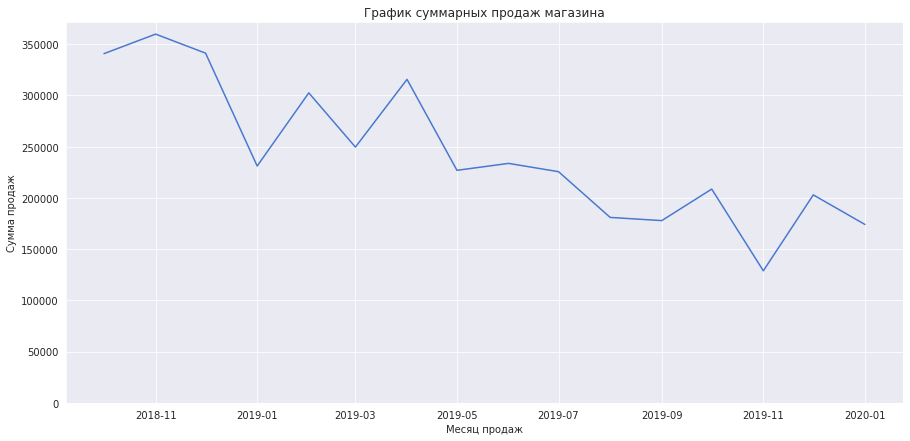

In [34]:
### Посмотреть помесячную динамику количества покупок

df_temp = df.groupby('year_month')['total'].sum()
display(df_temp)

sns.set_style('dark') # выбираем стиль сетки
sns.set_palette('muted') # выбираем стиль палитры
plt.figure(figsize=(15, 7)) # назначаем размер графика

# строим график средствами seaborn
sns.lineplot(x=df_temp.index, y=df_temp.values)

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График суммарных продаж магазина')
plt.xlabel('Месяц продаж')
plt.ylabel('Сумма продаж')

# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

# plt.xlim(0, 600) # ограничиваем ось X для наглядности
plt.ylim(0, None) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране


##### Выводы:
1. Помесячная выручка имеет падающий тренд.

#### Рассчитать помесячную динамику количества покупок

year_month
2018-10-01    236
2018-11-01    204
2018-12-01    275
2019-01-01    165
2019-02-01    286
2019-03-01    243
2019-04-01    264
2019-05-01    176
2019-06-01    159
2019-07-01    197
2019-08-01    173
2019-09-01    178
2019-10-01    203
2019-11-01    217
2019-12-01    246
2020-01-01    269
Name: order_id, dtype: int64

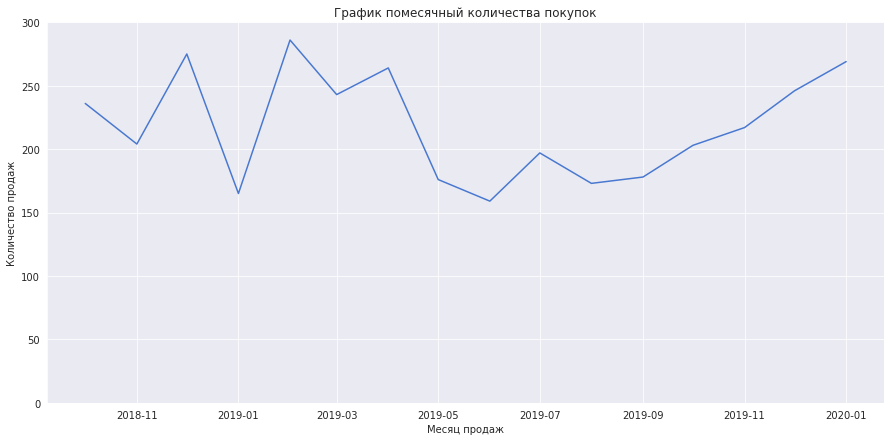

In [35]:
# Посмотреть помесячную динамику количества покупок

df_temp = df.groupby('year_month')['order_id'].nunique()
display(df_temp)

sns.set_style('dark') # выбираем стиль сетки
sns.set_palette('muted') # выбираем стиль палитры
plt.figure(figsize=(15, 7)) # назначаем размер графика

# строим график средствами seaborn
sns.lineplot(x=df_temp.index, y=df_temp.values)

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График помесячный количества покупок')
plt.xlabel('Месяц продаж')
plt.ylabel('Количество продаж')

# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

# plt.xlim(0, 600) # ограничиваем ось X для наглядности
plt.ylim(0, 300) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране


##### Вывод:
1. Однозначного тренда не наблюдаем.
2. Разброс значений количества покупок от 170 в худшие месяцы до 280 в лучшие месяцы.
3. После августа идет стабилизация и постепенный рост количества продаж.

#### Посчитать помесячный средний чек интернет магазина

,year_month,order_id,total,avg_check
,,nunique,sum,
0,2018-10-01,236,340715.00,1443.71
1,2018-11-01,204,359772.00,1763.59
2,2018-12-01,275,341198.00,1240.72
3,2019-01-01,165,231059.00,1400.36
4,2019-02-01,286,302441.00,1057.49
5,2019-03-01,243,249537.00,1026.90
6,2019-04-01,264,315614.00,1195.51
7,2019-05-01,176,226865.00,1289.01
8,2019-06-01,159,233624.00,1469.33


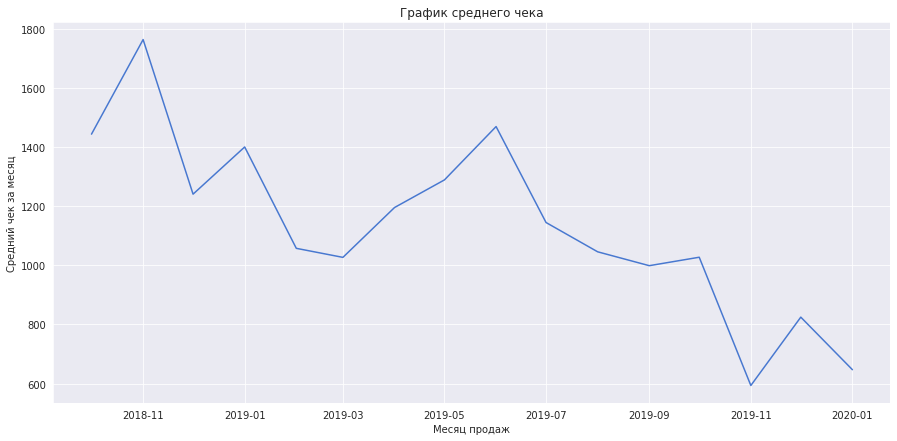

In [36]:
## 6. Посчитать помесячный средний чека  интернет магазина

df_temp = (df.groupby(['year_month'])
           .agg({
               'order_id': ['nunique'],
               'total' : ['sum']
           })
          )
df_temp = df_temp.reset_index()
df_temp['avg_check'] = df_temp[('total','sum')]/df_temp[('order_id','nunique')]
df_temp = df_temp.sort_values(by = ('year_month'))

display(df_temp)

sns.set_style('dark') # выбираем стиль сетки
sns.set_palette('muted') # выбираем стиль палитры
plt.figure(figsize=(15, 7)) # назначаем размер графика

# строим график средствами seaborn
sns.lineplot(x='year_month', y='avg_check', data = df_temp)

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График среднего чека')
plt.xlabel('Месяц продаж')
plt.ylabel('Средний чек за месяц')

# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

# plt.xlim(0, 600) # ограничиваем ось X для наглядности
#plt.ylim(0, 100000) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране


##### Выводы:
1. Помесячные средние чеки показывают убывающюю динамику.
2. Июнь 2019 выделяется на фоне соседних месяцев. Но после него так же имеется тенденция к снижений среднего чека

#### Посчитать динамику средней выручки с покупателя.

,year_month,customer_id,total,avg_total_customer
,,nunique,sum,
0,2018-10-01,177,340715.00,1924.94
1,2018-11-01,178,359772.00,2021.19
2,2018-12-01,225,341198.00,1516.44
3,2019-01-01,149,231059.00,1550.73
4,2019-02-01,244,302441.00,1239.51
5,2019-03-01,228,249537.00,1094.46
6,2019-04-01,235,315614.00,1343.04
7,2019-05-01,162,226865.00,1400.40
8,2019-06-01,150,233624.00,1557.49


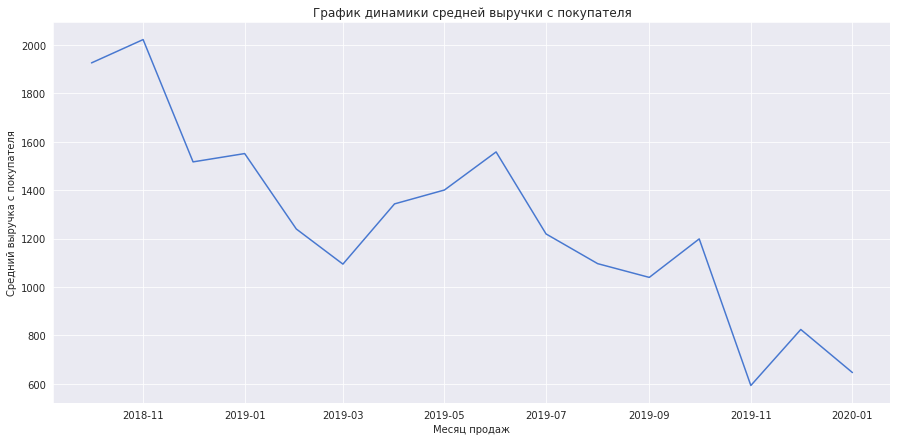

In [37]:
### Посчитать динамику средней выручки с покупателя.

df_temp = (df.groupby(['year_month'])
           .agg({
               'customer_id': ['nunique'],
               'total' : ['sum']
           })
          )
df_temp = df_temp.reset_index()
df_temp['avg_total_customer'] = df_temp[('total','sum')]/df_temp[('customer_id', 'nunique')]
df_temp = df_temp.sort_values(by = ('year_month'))

display(df_temp)

sns.set_style('dark') # выбираем стиль сетки
sns.set_palette('muted') # выбираем стиль палитры
plt.figure(figsize=(15, 7)) # назначаем размер графика

# строим график средствами seaborn
sns.lineplot(x='year_month', y='avg_total_customer', data = df_temp)

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График динамики средней выручки с покупателя')
plt.xlabel('Месяц продаж')
plt.ylabel('Средний выручка с покупателя')

# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

# plt.xlim(0, 600) # ограничиваем ось X для наглядности
#plt.ylim(0, 100000) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране


##### Вывод:
1. Средняя выручка с покупателя так же имеем убывающий тренд

In [38]:
df_temp = (df.groupby('order_id')
           .agg({
               'customer_id' : 'first',
               'year_month' : 'first',
               'total' : 'sum'
    
           })
          )
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('year_month'))
df_temp.head(2)

,order_id,customer_id,year_month,total
353,68541,ec7d88d5-2a52-4843-80d7-1f193f1c44e1,2018-10-01,149.00
440,68668,4d93d3f6-8b24-403b-a74b-f5173e40d7db,2018-10-01,3550.00


In [39]:
df_temp_2 = (df_temp.groupby('year_month')
             .agg({
                 'order_id': 'count',
                 'customer_id' : ['nunique'],
                 'total' : ['mean', 'median', 'min']
                 
             })
            )
df_temp_2 = df_temp_2.reset_index()
df_temp_2

year_month order_id customer_id   total             
                 count     nunique    mean median   min
0  2018-10-01      236         177 1443.71 955.50 82.00
1  2018-11-01      204         178 1763.59 896.50 15.00
2  2018-12-01      275         225 1240.72 734.00 44.00
3  2019-01-01      165         149 1400.36 674.00 22.00
4  2019-02-01      286         244 1057.49 599.00 22.00
5  2019-03-01      243         228 1026.90 637.00 44.00
6  2019-04-01      264         235 1195.51 595.50 22.00
7  2019-05-01      176         162 1289.01 813.00 22.00
8  2019-06-01      159         150 1469.33 600.00 14.00
9  2019-07-01      197         185 1144.80 599.00 42.00
10 2019-08-01      173         165 1045.72 582.00 44.00
11 2019-09-01      178         171  998.81 599.50 22.00
12 2019-10-01      203         174 1027.37 524.00 22.00
13 2019-11-01      217         217  593.51 187.00 11.00
14 2019-12-01      246         246  824.74 195.00  9.00
15 2020-01-01      269         269  646.98 188.00 10.00

In [40]:
df.sample(2)

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month,total
3133,2019051411,daef5362-af6c-4a0e-b838-831dc927475d,14770,Рассада Кабачка сорт Зебра кассета 6 шт E6,1,120.00,2019-05-14 11:00:00,2019-05-14,2019,5,14,11,2019-05-01,120.00
2535,2019042314,58a966e2-b773-4ddd-aeff-472f8320a6a3,14679,Пеларгония розебудная Prins Nikolai укорененны...,1,135.00,2019-04-23 14:00:00,2019-04-23,2019,4,23,14,2019-04-01,135.00


In [41]:
df_temp['year_month_2'] = df_temp['year_month'].astype(str).str[:7]

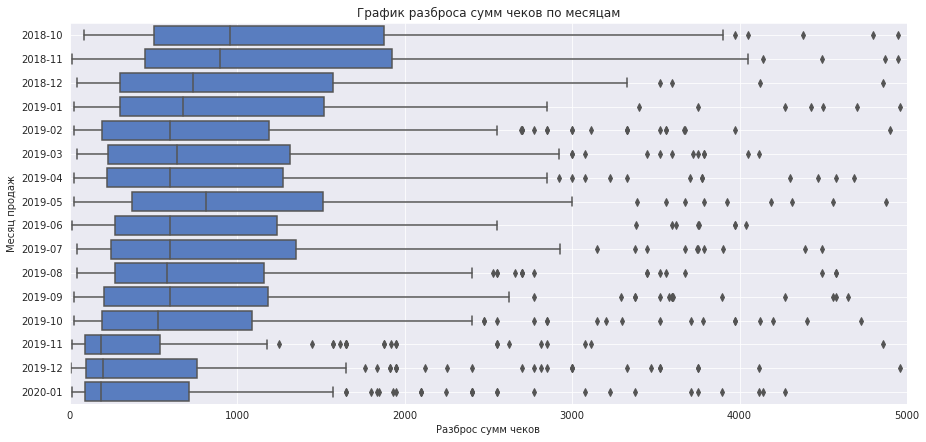

In [42]:
## sns.set_style('dark') # выбираем стиль сетки
#sns.set_palette('muted') # выбираем стиль палитры

plt.figure(figsize=(15, 7)) # назначаем размер графика

# Получаем цвета палитры 'muted'
muted_palette = sns.color_palette('muted')
first_color = muted_palette[0]

#median_order = df_temp.groupby('year_month')['total'].median().sort_values(ascending = False).index.tolist()
# строим столбчатый график средствами seaborn
sns.boxplot(y='year_month_2', x='total', data=df_temp, orient = 'h', color=first_color)#, order=median_order)

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График разброса сумм чеков по месяцам')
plt.xlabel('Разброс сумм чеков')
plt.ylabel('Месяц продаж')

# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

plt.xlim(0, 5000) # ограничиваем ось X для наглядности
#plt.ylim(0, 400) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране

#####  Вывод:
1. По графику разброса сумм чеков видно уменьшение медианы сумм чеков.


#### Произвести сегментацию товаров на категориям (по функционалу)

In [43]:
df.sample(2)

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month,total
2242,2019040512,cca3f0b3-fede-4ece-8b0e-096175e5a54a,14619,"Платикодон махровый синий объем 0,5 л",2,112.00,2019-04-05 12:00:00,2019-04-05,2019,4,5,12,2019-04-01,224.00
2931,2019050911,17ca17e1-9544-48ea-a053-368480d66e6f,14741,Рассада Пеларгония (герань) зональная Блу Айз ...,3,119.00,2019-05-09 11:00:00,2019-05-09,2019,5,9,11,2019-05-01,357.00


In [44]:
# 8. Произвести сегментацию товаров на категориям (по функционалу)
# Извлечем первые слова из наименования товара и выделим уникальные значения:

df['product'] = df['product'].str.lower()
#df['first_3_words'] = df['product'].str.split().str[:3].str.join(' ')
df['first_1_words'] = df['product'].str.split().str[:1].str.join(' ')
pd.set_option('display.max_rows', None)
df['first_1_words'].unique()

array(['комнатное', 'радермахера', 'хризолидокарпус', 'циперус',
       'шеффлера', 'юкка', 'настенная', 'таз', 'чехол', 'вешалка',
       'сушилка', 'крючок', 'корзина', 'сумка-тележка', 'многолетнее',
       'рассада', 'муляж', 'щетка-сметка', 'сумка', 'тарелка', 'вилка',
       'ложка', 'нож', 'герань', 'ерш', 'пеларгония', 'котел',
       'суккулент', 'эхеверия', 'доска', 'набор', 'коврик', 'подкладка',
       'дозатор', 'ёрш', 'цветок', 'эвкалипт', 'мусорный', 'плед',
       'скатерть', 'кувшин', 'адиантум', 'ковер', 'перчатки', 'стремянка',
       'гладильная', 'лестница-стремянка', 'толкушка', 'тележка',
       'готовая', 'искусственный', 'простыня', 'чайник', 'штора', 'банка',
       'стяжка', 'комплект', 'кампанула', 'декоративная', 'противень',
       'калатея', 'нолина', 'плечики', 'подушка', 'полотенце',
       'хлорофитум', 'цикламен', 'глоксиния', 'азалия', 'гортензия',
       'хризантема', 'петля', 'стеклянная', 'салфетка', 'вкладыши',
       'миксер', 'кофр', 'стиральны

In [45]:
# Сформируем словари для категорий товаров

cat_1 = ['цикламен,', 'львиный', 'пуансеттия', 'комнатное', 'радермахера', 'хризолидокарпус', 'циперус', 'шеффлера', 'юкка', 'многолетнее', 'рассада', 'герань', 'пеларгония', 'суккулент', 'эхеверия', 'цветок', 'эвкалипт', 'адиантум', 'кампанула', 'калатея', 'нолина', 'хлорофитум', 'цикламен', 'глоксиния', 'азалия', 'гортензия', 'хризантема', 'мирт', 'цветущее', 'кориандр', 'иссоп', 'сантолина', 'аспарагус', 'афеляндра', 'антуриум', 'молодило', 'фиалка', 'гербера', 'душица', 'мелисса', 'роза', 'бегония', 'салат', 'розмарин', 'альбука', 'бальзамин', 'крассула', 'артемизия', 'тыква', 'осина', 'лаванда', 'мята', 'каланхое', 'примула', 'дендробиум', 'калоцефалус', 'каллуна', 'капсикум', 'мимоза', 'соланум', 'бархатцы', 'космея', 'настурция', 'петуния', 'алиссум', 'гвоздика', 'годеция', 'календула', 'кореопсис', 'лапчатка', 'львиный зев', 'флокс', 'цинерария', 'эшшольция', 'морковь', 'огурец', 'капуста', 'клен', 'лук', 'клубника', 'патиссон', 'джункус', 'драцена', 'фатсия', 'лен', 'пахира', 'литопс', 'диффенбахия', 'фаленопсис', 'подсолнечник', 'пуансетия', 'гиностемма', 'ель', 'кипарисовик', 'аптения', 'скиммия', 'табак', 'фиттония', 'тимьян', 'алоэ', 'спатифиллум', 'фикус', 'кодонанта', 'цикламен', 'гимнокалициум', 'эхинокактус', 'крокусы', 'гипсофила', 'калибрахоа', 'эпипремнум', 'аквилегия', 'базилик', 'горох', 'земляника', 'незабудка', 'седум', 'томат', 'укроп', 'нефролепис', 'калла', 'декабрист', 'тюльпан', 'гиацинт', 'вербена', 'однолетнее', 'амариллис', 'замиокулькас', 'мединилла', 'отделитель', 'импатиенс', 'вигна', 'кабачок', 'хамедорея', 'зверобой', 'любисток', 'петрушка', 'сельдерей', 'шалфей', 'лантана', 'лаватера', 'анемона', 'буддлея', 'валериана', 'змееголовник', 'физостегия', 'бадан', 'антинакипин', 'барвинок', 'рудбекия', 'сциндапсус', 'пряные', 'бузульник', 'камнеломка', 'солидаго', 'муррайя', 'портулак', 'астра', 'аргирантерум', 'левкой', 'вероника', 'целозия', 'маттиола', 'сальвия', 'арбуз', 'баклажан', 'хоста', 'гайлардия', 'монарда', 'нивянник', 'чабер', 'бакопа', 'ранункулус', 'газания', 'овсянница', 'георгина', 'смолевка', 'цинния', 'лавр', 'вербейник', 'виола', 'колокольчик', 'котовник', 'эхинацея', 'ясколка', 'лилейник', 'папоротник', 'платикодон', 'энотера', 'фуксия', 'цитрофортунелла', 'пеперомия', 'дыня', 'циния', 'синнингия', 'гардения', 'томата', 'лобелия', 'девичий', 'мускари', 'пиретрум', 'тагетис', 'агератум', 'колеус', 'цинерания']

cat_2 = ['таз', 'тарелка', 'вилка', 'ложка', 'нож', 'котел', 'толкушка', 'чайник', 'банка', 'кувшин', 'набор', 'дозатор', 'корзинка', 'противень', 'миксер', 'tepмокружка', 'мусорный', 'урна-пепельница', 'скалка', 'мини-сковорода', 'сковорода', 'ведро', 'ножеточилка', 'венчик', 'сито', 'масленка', 'сервировочная', 'салатник', 'чайный', 'овощеварка', 'терка', 'кружка', 'лопатка', 'салфетница', 'стакан', 'столовая', 'чайная', 'овощечистка', 'рыбочистка', 'корыто', 'половник', 'сахарница', 'завертка', 'отжим', 'сотейник', 'тортница', 'блюдо', 'измельчитель', 'мантоварка', 'ковш', 'кухонные', 'картофелемялка', 'жестяная', 'рассекатель', 'бидон', 'крышка', 'миска', 'бульонница', 'разделочная', 'мантоварка-пароварка', 'фарфоровая', 'столовый', 'термокружка', 'термостакан', 'термос', 'пресс', 'электроштопор', 'кастрюля', 'блюдце', 'хлебница', 'орехоколка', 'кухонное', 'просеиватель', 'форма', 'кофе']

cat_3 = ['чехол', 'плед', 'скатерть', 'простыня', 'штора', 'коврик', 'подкладка', 'перчатки', 'подушка', 'полотенце', 'салфетка', 'вкладыши', 'покрывало', 'одеяло', 'простынь', 'новогоднее', 'ковёр', 'подрукавник', 'подголовник', 'вешалка-плечики', 'наматрасник', 'наматрицник-чехол', 'халат', 'тряпка', 'двуспальное', 'пододеяльник', 'наволочка', 'наматрацник', 'ткань', 'махровое', 'махровый', 'подарочный']

cat_4 = ['фал','подставка','вешалка', 'сушилка', 'крючок', 'корзина', 'сумка-тележка', 'сумка', 'тележка', 'бак', 'плечики', 'кофр', 'стеллаж', 'тряпкодержатель', 'контейнер', 'ящик', 'коробка', 'урна', 'обувница-3', 'щетка-сметка', 'ерш', 'ёрш', 'доска', 'ковер', 'гладильная', 'стремянка', 'лестница-стремянка', 'петля-стрела', 'стяжка', 'петля', 'щетка', 'чистящий', 'стиральный', 'шпингалет', 'сметка', 'измерительный', 'линейка', 'прищепки', 'крепеж', 'пружина', 'стремянки', 'щетка-утюжок', 'веник', 'швабра', 'карниз', 'сверло-фреза', 'стяжки', 'мерный', 'уголок', 'щётка', 'решетка', 'ручка', 'бельевые', 'фиксатор-шар', 'окномойка', 'вешалка-стойка', 'держатель', 'лоток', 'вешалки', 'ролик', 'скребок', 'комод', 'шило', 'пробка', 'кисточка', 'покрытие', 'веревка', 'мешок', 'шпагат', 'насадка-моп', 'сетка', 'вешалка-сушилка', 'ручка-скоба', 'стремянка-табурет', 'вантуз', 'этажерка', 'полки', 'ключница', 'емкость', 'складная', 'вешалка-перекладина', 'модульная', 'лестница', 'совок', 'пылесос', 'штанга', 'штангенциркуль', 'рукав', 'муляж', 'настенная', 'искусственный', 'декоративная', 'стеклянная', 'светильник', 'ваза', 'подвесное', 'полка', 'искусственная', 'подарочный', 'настольная', 'сиденье', 'фоторамка']

cat_5 = ['жидкое', 'пена', 'зубная', 'средство', 'паста', 'отбеливатель', 'концентрат', 'антижир', 'универсальное', 'ароматизированное', 'бальзам', 'мыло', 'губка', 'ополаскиватель', 'мыльница', 'кондиционер', 'защитный', 'многофункциональное', 'защитная', 'гипоаллергенный', 'увлажняющая', 'мыло-скраб', 'нетканые']

cat_6 = ['холодная', 'линейка,', 'сверло-фреза,', 'многофункциональный', 'ножеточка', 'сверло-фреза','утюг', 'насадка', 'шнур', 'кипятильник', 'вакуумный', 'соковыжималка', 'пьезозажигалка', 'соковарка', 'автоматическая', 'фен', 'термометр', 'сверло', 'весы', 'электроштопор', 'насадка-отжим', 'пылесос', 'штангенциркуль']

cat_7 = ['готовая', 'комплект', 'бензин', 'универсальный', 'запасная', 'шприц', 'сменный', 'основание', 'складной', 'кольца', 'сменная', 'ванна']



In [46]:
# добавим функцию для категоризации товаров

def get_category(item):
    if item in cat_1:
            return 'Растения и цветы'
    elif item in cat_2:
      return 'Кухонные принадлежности'

    elif item in cat_3:
      return 'Домашний текстиль'

    elif item in cat_4:
      return 'Хозяйственные товары'

    elif item in cat_5:
      return 'Бытовая химия и уход'

    elif item in cat_6:
      return 'Бытовая техника и инструменты'

    elif item in cat_7:
      return 'Прочее'

    return "Прочее"


In [47]:
# добавим в таблицу колонку с категорией товара, определенного по первому слову наименования

df['category'] = df['first_1_words'].apply(get_category)

In [48]:
df['category'].value_counts()

Растения и цветы                 2739
Хозяйственные товары             1617
Кухонные принадлежности           519
Домашний текстиль                 487
Бытовая техника и инструменты      52
Бытовая химия и уход               45
Прочее                             26
Name: category, dtype: int64

##### Вывод:
1. Разделили все товары на 7 категорий и посмотрели самые популярные:
    - Растения и цветы                 2739
    - Хозяйственные товары             1618
    - Кухонные принадлежности           519
    - Домашний текстиль                 487
    - Бытовая техника и инструменты      52
    - Бытовая химия и уход               45
    - Прочее                             26
    


In [49]:
df.sample(2)

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month,total,first_1_words,category
4539,2019100111,64635c76-3bb8-4594-b85f-0a14cb075b36,72821,карниз для ванной комнаты виолет раздвижной 28...,24,214.00,2019-10-01 11:00:00,2019-10-01,2019,10,1,11,2019-10-01,5136.00,карниз,Хозяйственные товары
4163,2019080611,a0ce9b81-dad7-48f6-a28a-bb671c05166f,72220,чайная ложка trendy сталь 2 мм 3 шт attribute ...,7,172.00,2019-08-06 11:00:00,2019-08-06,2019,8,6,11,2019-08-01,1204.00,чайная,Кухонные принадлежности


In [50]:
df_temp = df.groupby('category').agg({
    'total': ['sum'],
    'quantity' : 'sum'
})
df_temp = df_temp.sort_values(by = ('total', 'sum'), ascending = False)
df_temp

,total,quantity
,sum,sum
category,,
Хозяйственные товары,2276311.42,6019
Домашний текстиль,593305.67,963
Растения и цветы,534960.33,4266
Кухонные принадлежности,405239.00,1572
Бытовая техника и инструменты,44368.00,141
Прочее,27689.00,128
Бытовая химия и уход,17446.00,103


In [51]:
# Зададим цвет для каждой категории

use_palette = sns.color_palette('muted')
palette_order = {'Хозяйственные товары': use_palette[0],
                'Домашний текстиль': use_palette[1],
                 'Растения и цветы': use_palette[2],
                 'Кухонные принадлежности': use_palette[3],
                 'Бытовая техника и инструменты': use_palette[4],
                 'Прочее': use_palette[5],
                 'Бытовая химия и уход' : use_palette[6]
                }
#palette_order


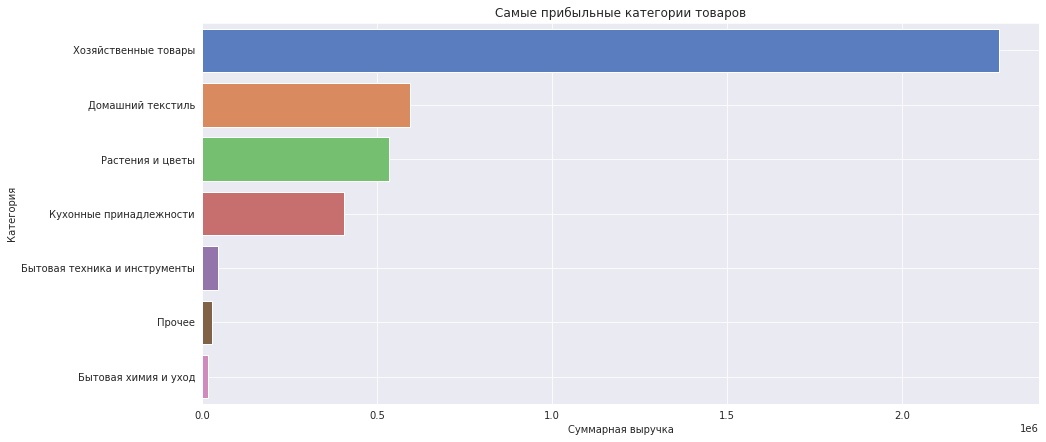

In [52]:
sns.set_style('dark') # выбираем стиль сетки
sns.set_palette('muted') # выбираем стиль палитры

plt.figure(figsize=(15, 7)) # назначаем размер графика

# строим столбчатый график средствами seaborn
sns.barplot(y=df_temp.index, x=df_temp[('total', 'sum')], orient='h', palette=palette_order)

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Самые прибыльные категории товаров')
plt.ylabel('Категория')
plt.xlabel('Суммарная выручка')

# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

# plt.xlim(0, 600) # ограничиваем ось X для наглядности
# plt.ylim(0, 5000) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране

##### Вывод:
1. Самая высокая выручка у категории "Хозяйственные товары"
2. Далее по выручке идут категории: "Домашний текстиль", "Растения и цветы", "Кухонные принадлежности"
3. Категории приносящие меньше всего выручки: "Бытовая техника", "Бытовая химия и уход", "Прочее"

#### Вывести товары, которые принесли больше всего выручки

In [53]:
df_temp = df.groupby('product').agg({
    'total': ['sum'],
    'price' : 'mean',
    'quantity' : 'sum',
    'category' : 'first'
})
df_temp = df_temp.sort_values(by = ('total', 'sum'), ascending = False)
df_temp.head(10)

,total,price,quantity,category
,sum,mean,sum,first
product,,,,
простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232.00,1852.00,30,Домашний текстиль
сумка-тележка 2-х колесная gimi argo синяя,50405.00,1072.45,47,Хозяйственные товары
вешалки мягкие для деликатных вещей 3 шт шоколад,49596.00,156.00,335,Хозяйственные товары
тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,33992.00,616.00,59,Хозяйственные товары
муляж яблоко 9 см красное,32702.00,56.33,618,Хозяйственные товары
набор ножей attribute chef 5 предметов akf522,29248.00,457.00,64,Кухонные принадлежности
"сумка-тележка хозяйственная andersen scala shopper plus, lini, синяя 133-108-90",28045.00,5609.00,5,Хозяйственные товары
сушилка meliconi stendy junior,27970.00,5594.00,5,Хозяйственные товары


In [54]:
df_temp = df.pivot_table(index = 'year_month', columns='category', values = 'total', aggfunc = 'sum')
df_temp = df_temp.sort_values(by = '2018-10-01' ,axis = 1 , ascending= False)

df_temp = df_temp.reset_index()
df_temp

category,year_month,Хозяйственные товары,Кухонные принадлежности,Домашний текстиль,Растения и цветы,Бытовая техника и инструменты,Прочее,Бытовая химия и уход
0,2018-10-01,203284.00,53353.00,50185.00,30309.00,1744.00,1237.00,603.00
1,2018-11-01,204750.00,77942.00,53621.00,21115.00,1450.00,105.00,789.00
2,2018-12-01,209835.00,31753.00,75548.00,13830.00,4917.00,2701.00,2614.00
3,2019-01-01,94683.00,22692.00,82303.00,23661.00,1424.00,5533.00,763.00
4,2019-02-01,197458.00,42454.00,25116.00,30547.00,1236.00,2584.00,3046.00
5,2019-03-01,147569.00,26683.00,24241.00,48260.00,1371.00,NaN,1413.00
6,2019-04-01,136839.00,18207.00,59576.00,91411.00,8600.00,712.00,269.00
7,2019-05-01,111699.00,9761.00,7484.00,96343.00,1578.00,NaN,NaN
8,2019-06-01,152769.00,5437.00,38046.00,37372.00,NaN,NaN,NaN
9,2019-07-01,134936.00,21357.00,38939.00,26789.00,1332.00,2173.00,NaN


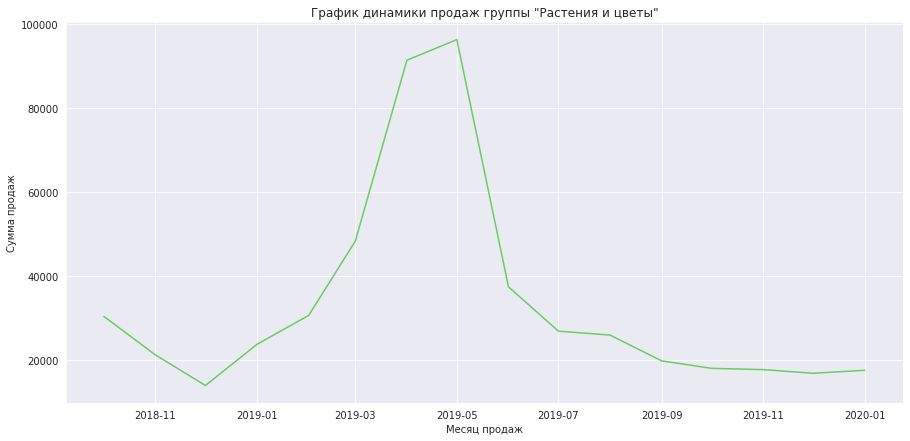

In [55]:
sns.set_style('dark') # выбираем стиль сетки
sns.set_palette('muted') # выбираем стиль палитры
plt.figure(figsize=(15, 7)) # назначаем размер графика

# строим график средствами seaborn
sns.lineplot(x='year_month', y='Растения и цветы', data = df_temp, color = sns.color_palette('muted')[2])

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График динамики продаж группы "Растения и цветы"')
plt.xlabel('Месяц продаж')
plt.ylabel('Сумма продаж')

# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

# plt.xlim(0, 600) # ограничиваем ось X для наглядности
#plt.ylim(0, 100000) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране


In [56]:
df.sample(2)

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month,total,first_1_words,category
5406,2020012118,f888f988-9606-41f4-ba46-44ad3d0107b5,102725,рассада зелени для кухни мята икс пиперита цит...,1,120.00,2020-01-21 18:00:00,2020-01-21,2020,1,21,18,2020-01-01,120.00,рассада,Растения и цветы
640,2018111119,32f901c4-6730-4a1d-8284-eb71a68bc8fb,68953,альбука спиралис фризл-сизл d-12 см,1,472.00,2018-11-11 19:00:00,2018-11-11,2018,11,11,19,2018-11-01,472.00,альбука,Растения и цветы


In [57]:
# Зададим цвет для каждой категории

use_palette = sns.color_palette('muted')
palette_order = {'Хозяйственные товары': use_palette[0],
                'Домашний текстиль': use_palette[1],
                 'Растения и цветы': use_palette[2],
                 'Кухонные принадлежности': use_palette[3],
                 'Бытовая техника и инструменты': use_palette[4],
                 'Прочее': use_palette[5],
                 'Бытовая химия и уход' : use_palette[6]
                }
#palette_order

In [58]:
df_temp = df.groupby(['year_month','category']).agg({
    'total': 'sum'
})
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('year_month'))

#df_temp.head(10)

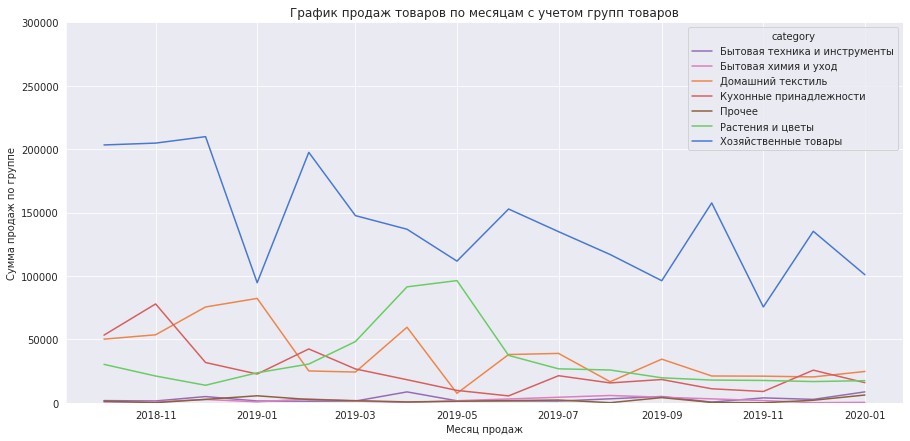

In [59]:
sns.set_style('dark') # выбираем стиль сетки
sns.set_palette('muted') # выбираем стиль палитры
plt.figure(figsize=(15, 7)) # назначаем размер графика

# строим столбчатый график средствами seaborn
sns.lineplot(x='year_month', y='total', hue='category', data=df_temp, palette=palette_order)

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График продаж товаров по месяцам с учетом групп товаров')
plt.xlabel('Месяц продаж')
plt.ylabel('Сумма продаж по группе')

# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

#plt.xlim(4, 5) # ограничиваем ось X для наглядности
plt.ylim(0, 300000) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране

##### Вывод:
    1. Во всех категориях имеется тенденция на снижение выручки на всем периоде.
    2. В категории "Хозяйственные товары" имеются хорошие продажи 2018 года. Так же имеются провалы продаж января 2019, сентября 2019, ноября 2019.
    3. В категории "Кухонные принадлежности" видим пик продаж в ноябре 2018, и постепенное снижение продаж на остальном периодами.
    4. В категории "Домашний текстиль"  видим пик продаж в январе 2019 и постепенное снижение продаж на остальном периоде, особенно выделяется низкими продажами май 2019 
    5. В категории "Растения и цветы" видим сезонность продаж, в марте продажи начинают увеличиваться, с пиковыми продажами в апреле и мае, лето держатся средние значения продаж, а в осенние и зимние месяцы продажи стабильно низкие продаж
     

#### Произвести сегментацию покупателей используя RFM-анализ

In [60]:
# посчитаем для пользователей дату последней покупки, Количество чеко и суммарную выручку
df_customer = (df.groupby(['customer_id'])
           .agg({
               'datetime':['last'],
               'order_id' :['nunique'],
               'total': 'sum'
           })
          )
df_customer = df_customer.reset_index()

df_customer = df_customer.sort_values(by = ('total', 'sum'), ascending = False)
df_customer.head(5)


,customer_id,datetime,order_id,total
,,last,nunique,sum
1884,c971fb21-d54c-4134-938f-16b62ee86d3b,2019-03-06 12:00:00,126,159508.00
729,4d93d3f6-8b24-403b-a74b-f5173e40d7db,2018-10-24 14:00:00,35,57278.00
822,58a4c3cc-504f-43ea-a74a-bae19e665552,2019-01-15 13:00:00,2,53232.00
195,146cd9bf-a95c-4afb-915b-5f6684b17444,2019-06-11 07:00:00,1,49432.00
687,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,2019-04-19 19:00:00,4,41900.00


In [61]:
df_customer = df_customer.sort_values(by = ('order_id', 'nunique'), ascending = False)
df_customer.head(5)

,customer_id,datetime,order_id,total
,,last,nunique,sum
1884,c971fb21-d54c-4134-938f-16b62ee86d3b,2019-03-06 12:00:00,126,159508.00
729,4d93d3f6-8b24-403b-a74b-f5173e40d7db,2018-10-24 14:00:00,35,57278.00
1079,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,2019-10-31 14:00:00,17,21361.00
1718,b7b865ab-0735-407f-8d0c-31f74d2806cc,2019-04-23 17:00:00,7,3779.00
17,0184f535-b60a-4914-a982-231e3f615206,2019-05-23 12:00:00,5,5681.00


In [62]:
# Распределим пользователей по показателю Recensy

user_cat_r_1 = df_customer[('datetime','last')].quantile(0.333)
user_cat_r_3 = df_customer[('datetime','last')].quantile(0.666)

#display(user_cat_r_1,'',user_cat_r_3)

def rank_of_recency(last_date):
  if last_date > user_cat_r_3:
    return '3'
  elif last_date < user_cat_r_1:
    return '1'
  else: return '2'
df_customer['r'] = df_customer[('datetime','last')].apply(rank_of_recency)
df_customer.sample(5)

,customer_id,datetime,order_id,total,r
,,last,nunique,sum,
892,601b9c5d-b87b-47d9-95d0-269c734ad5b4,2019-12-14 17:00:00,2,1439.00,3
1838,c41cd9ac-1385-430b-ac97-f4613802e16d,2019-12-08 11:00:00,2,2368.00,3
1574,ab100671-3e8f-48c8-a3c7-7d2e200d67d8,2019-05-30 22:00:00,2,1026.00,2
497,3528c422-619e-4e6d-b654-5bbc84124c73,2019-08-05 10:00:00,1,1499.00,2
1418,98a50246-ed64-4100-b114-4c97db4f4b3e,2018-12-15 12:00:00,1,2999.00,1


In [63]:
df_customer['r'].value_counts()

3    806
2    804
1    802
Name: r, dtype: int64

In [64]:
# Распределим пользователей по показателю Frequency:

In [65]:
df_customer[('order_id','nunique')].value_counts()

1      1539
2       845
3        20
4         3
126       1
5         1
7         1
17        1
35        1
Name: (order_id, nunique), dtype: int64

##### Вывод: 
1. Пользователи редко возвращаются и совершают покупки. Разделим на две категории: 
    - Совершившие одну покупку.
    - Совершившие более одной покупки





In [66]:
user_cat_f_1 = df_customer[('order_id','nunique')].quantile(0.33)
user_cat_f_3 = df_customer[('order_id','nunique')].quantile(0.5)

#display(user_cat_f_1,'',user_cat_f_3)


def rank_of_frequency(total_order):
  if total_order > user_cat_f_3:
    return '3'
  elif total_order < user_cat_f_1:
    return '1'
  else: return '2'
df_customer['f'] = df_customer[('order_id','nunique')].apply(rank_of_frequency)
df_customer.sample(5)

,customer_id,datetime,order_id,total,r,f
,,last,nunique,sum,,
445,2fac41bf-e800-4bc3-a4b3-0df800f33e99,2019-10-23 11:00:00,1,3200.00,3,2
2176,e8d299f8-0a12-4dfe-be88-7ff12967d643,2019-05-27 13:00:00,1,480.00,2,2
1744,ba6b1c8e-1108-467a-84cb-ac32c576e399,2019-01-03 09:00:00,1,299.00,1,2
545,39cdda92-97b9-4945-931c-5fc6d6f6d9dd,2019-10-21 09:00:00,1,1574.00,3,2
903,619b1249-5ca2-4712-8455-88999a6f4212,2019-12-17 15:00:00,2,2638.00,3,3


In [67]:
df_customer['f'].value_counts()

2    1539
3     873
Name: f, dtype: int64

In [68]:
# Распределим пользователей по показателю Monetary
# df_customer[('total','sum')].describe()

In [69]:
# Распределим пользователей по показателю Monetary

user_cat_m_1 = df_customer[('total','sum')].quantile(0.333)
user_cat_m_3 = df_customer[('total','sum')].quantile(0.666)

#display(user_cat_m_1,'',user_cat_m_3)

def rank_of_revenue(total_revenue):
  if total_revenue > user_cat_m_3:
    return '3'
  elif total_revenue < user_cat_m_1:
    return '1'
  else: return '2'
df_customer['m'] = df_customer[('total','sum')].apply(rank_of_revenue)
df_customer.sample(2)

,customer_id,datetime,order_id,total,r,f,m
,,last,nunique,sum,,,
1136,79a0aeca-09fc-41e5-b6eb-2d0b6130dfec,2019-11-19 12:00:00,2,637.00,3,3,2
2073,dc9eeb94-819e-46a0-9f40-28562193626b,2019-12-06 12:00:00,2,4117.50,3,3,3


In [70]:
df_customer['m'].value_counts()

2    810
3    806
1    796
Name: m, dtype: int64

In [71]:
df_customer['rfm'] = df_customer['r'] + df_customer['f'] + df_customer['m']
df_customer.sample(5)

,customer_id,datetime,order_id,total,r,f,m,rfm
,,last,nunique,sum,,,,
479,337889bb-2ba7-4173-b4f1-4e7c2cb55fd1,2019-12-04 20:00:00,2,3448.00,3,3,3,333
2171,e8236159-1452-49d4-bd71-6135d8d2ab67,2019-07-02 17:00:00,1,149.00,2,2,1,221
1883,c95edf0c-81c3-476a-8e20-96334a8e1a58,2019-10-10 16:00:00,1,1087.00,2,2,2,222
2377,fc4b5242-d331-4643-951d-90d2d4fe0382,2020-01-26 21:00:00,2,1033.00,3,3,2,332
2031,d7e993fe-b99e-411a-8dcb-f6abaf50a2a2,2019-12-03 07:00:00,2,1450.00,3,3,3,333


In [72]:
df_customer.columns = ['customer_id', 'datetime_last', 'order_id_nunique', 'total_sum', 'r','f','m','rfm']
df_customer.sample(5)

,customer_id,datetime_last,order_id_nunique,total_sum,r,f,m,rfm
2213,ecc69147-1112-4c17-a573-cf1c3a42e83d,2020-01-18 23:00:00,2,824.00,3,3,2,332
253,1a44dab1-2a18-4c95-83a1-b64e4e883f5f,2019-12-31 10:00:00,2,374.00,3,3,1,331
1328,8ef7b146-52e4-41f2-8774-caa487f9c3b7,2019-02-14 16:00:00,1,378.00,1,2,1,121
36,03427797-398e-497d-a303-48879e7ba7f7,2019-08-12 21:00:00,1,525.00,2,2,2,222
1728,b860d201-0bbd-4da8-a910-b2d32c5507b2,2019-06-21 10:00:00,1,187.00,2,2,1,221


In [73]:
df_customer['rfm'].value_counts()

333    310
221    293
121    266
332    255
122    255
222    236
123    222
223    185
331    159
233     48
321     45
133     26
232     24
322     22
132     18
231     18
323     15
131     15
Name: rfm, dtype: int64

In [74]:
# Сформируем словари для категорий покупателей

cat_customer_3 = ['333','332','331','323','322','321','313','312','311']

cat_customer_2 = ['233','232','231','223','222','221','213','212','211']

cat_customer_1 = ['133','132','131','123','122','121','113','112','111']

In [75]:
# добавим функцию для категоризации ПОтребителей

def get_category_customer(rfm):
    if rfm in cat_customer_3:
            return 'Постоянные клиенты'
    elif rfm in cat_customer_2:
      return 'Неактивные клиенты'

    elif rfm in cat_customer_1:
      return 'Ушедшие клиенты'

    return "Категория не найдена"
# Домашний текстиль

In [76]:
df_customer['customer_category'] = df_customer['rfm'].apply(get_category_customer)
df_customer.sample(2)

,customer_id,datetime_last,order_id_nunique,total_sum,r,f,m,rfm,customer_category
1077,73beb3d4-ed29-4c81-90fe-cc99dd4fdaf9,2019-09-24 10:00:00,1,134.00,2,2,1,221,Неактивные клиенты
1832,c34acb45-5fe0-4456-9c9e-9167585b8f7b,2019-10-15 13:00:00,1,3149.00,2,2,3,223,Неактивные клиенты


In [77]:
df_customer['customer_category'].value_counts()

Постоянные клиенты    806
Неактивные клиенты    804
Ушедшие клиенты       802
Name: customer_category, dtype: int64

In [78]:
df_customer.sort_values(by='total_sum', ascending = False).head(5)

,customer_id,datetime_last,order_id_nunique,total_sum,r,f,m,rfm,customer_category
1884,c971fb21-d54c-4134-938f-16b62ee86d3b,2019-03-06 12:00:00,126,159508.00,1,3,3,133,Ушедшие клиенты
729,4d93d3f6-8b24-403b-a74b-f5173e40d7db,2018-10-24 14:00:00,35,57278.00,1,3,3,133,Ушедшие клиенты
822,58a4c3cc-504f-43ea-a74a-bae19e665552,2019-01-15 13:00:00,2,53232.00,1,3,3,133,Ушедшие клиенты
195,146cd9bf-a95c-4afb-915b-5f6684b17444,2019-06-11 07:00:00,1,49432.00,2,2,3,223,Неактивные клиенты
687,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,2019-04-19 19:00:00,4,41900.00,2,3,3,233,Неактивные клиенты


In [79]:
df_customer.sample(2)

,customer_id,datetime_last,order_id_nunique,total_sum,r,f,m,rfm,customer_category
287,1e5e5080-e5de-41da-b930-4d627510f02e,2019-12-28 23:00:00,2,156.00,3,3,1,331,Постоянные клиенты
719,4c628e02-c6a4-4cfd-a176-3d71c65ed964,2019-01-01 21:00:00,1,1799.00,1,2,3,123,Ушедшие клиенты


### Проверка гипотез

#### Провести проверку гипотезу о различие среднего чека для групп покупателей. Сформулируем гипотезы:
        - H0: Средние чеки в группах покупателей не отличаются
        - H1: Средние чеки в группах покупателей отличаются

In [81]:
df_customer.sample()

,customer_id,datetime_last,order_id_nunique,total_sum,r,f,m,rfm,customer_category
314,22160585-7ab8-45bf-82d4-95752ea1f74c,2019-07-08 08:00:00,1,4494.00,2,2,3,223,Неактивные клиенты


In [82]:
df_customer['avg_check'] = df_customer['total_sum'] / df_customer['order_id_nunique']

In [83]:
# Создадим списки для проведения тестов
a = df_customer[df_customer['customer_category'] == 'Ушедшие клиенты']['avg_check'].tolist()
b = df_customer[df_customer['customer_category'] == 'Неактивные клиенты']['avg_check'].tolist()
c = df_customer[df_customer['customer_category'] == 'Постоянные клиенты']['avg_check'].tolist()

# Проверка нормальности

#Если p-value > 0.05 → распределение нормальное.
#Если p-value < 0.05 → распределение ненормальное → используем U-тест Манна-Уитни.


shapiro1 = stats.shapiro(a)
shapiro2 = stats.shapiro(b)
shapiro3 = stats.shapiro(c)


print('Проверка нормальности распределения (Шапиро-Уилк)')

print(f"Группа 1: p-value = {shapiro1.pvalue}")  
if shapiro1.pvalue < 0.05:
    print('Распределение ненормальное → используем U-тест Манна-Уитни.')
else:
    print('Распределение нормальное → используем  t-тест (Student’s t-test)')
print('')
    

print(f"Группа 2: p-value = {shapiro2.pvalue}")  
if shapiro2.pvalue < 0.05:
    print('Распределение ненормальное → используем U-тест Манна-Уитни.')
else:
    print('Распределение нормальное → используем  t-тест (Student’s t-test)')
print('')


print(f"Группа 3: p-value = {shapiro3.pvalue}")  
if shapiro3.pvalue < 0.05:
    print('Распределение ненормальное → используем U-тест Манна-Уитни.')
else:
    print('Распределение нормальное → используем  t-тест (Student’s t-test)')
print('')



Проверка нормальности распределения (Шапиро-Уилк)
Группа 1: p-value = 2.802596928649634e-45
Распределение ненормальное → используем U-тест Манна-Уитни.

Группа 2: p-value = 1.401298464324817e-45
Распределение ненормальное → используем U-тест Манна-Уитни.

Группа 3: p-value = 1.1947471115788334e-33
Распределение ненормальное → используем U-тест Манна-Уитни.



In [84]:
# Провести проверку гипотезу о различие среднего чека для групп покупателей. Сформулируем гипотезы:
#        - H0: Средние чеки в группах покупателей не отличаются
#        - H1: Средние чеки в группах покупателей отличаются
alpha = 0.05

print('Провести проверку гипотезу о различие среднего чека для групп покупателей. Сформулируем гипотезы:')   
print('H0: Средние чеки в группах покупателей не отличаются') 
print('H1: Средние чеки в группах покупателей отличаются \n') 


print('Проведем попарную проверку сегментов покупателей: \n') 

print('Сравним 1 группу со 2 группой: \n') 
t_stat, p_value = stats.mannwhitneyu(a, b)
print(f"t-статистика: {t_stat}, p-value: {p_value}")
    
if p_value < alpha:
    print("Отвергаем H₀: распределения различаются (p < 0.05) \n")
else:
    print("Нет оснований отвергать H₀ (p ≥ 0.05) \n")
    
print('Сравним 2 группу с 3 группой: \n')
t_stat, p_value = stats.mannwhitneyu(b, c)
print(f"t-статистика: {t_stat}, p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем H₀: распределения различаются (p < 0.05) \n")
else:
    print("Нет оснований отвергать H₀ (p ≥ 0.05) \n")
    

print('Сравним 1 группу с 3 группой: \n')
t_stat, p_value = stats.mannwhitneyu(a, c)
print(f"t-статистика: {t_stat}, p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем H₀: распределения различаются (p < 0.05) \n")
else:
    print("Нет оснований отвергать H₀ (p ≥ 0.05) \n")
    

Провести проверку гипотезу о различие среднего чека для групп покупателей. Сформулируем гипотезы:
H0: Средние чеки в группах покупателей не отличаются
H1: Средние чеки в группах покупателей отличаются 

Проведем попарную проверку сегментов покупателей: 

Сравним 1 группу со 2 группой: 

t-статистика: 341959.5, p-value: 0.03534111836615672
Отвергаем H₀: распределения различаются (p < 0.05) 

Сравним 2 группу с 3 группой: 

t-статистика: 354788.5, p-value: 0.0009681713127282179
Отвергаем H₀: распределения различаются (p < 0.05) 

Сравним 1 группу с 3 группой: 

t-статистика: 375315.0, p-value: 2.1786723524202813e-08
Отвергаем H₀: распределения различаются (p < 0.05) 



##### Вывод:
1. Провести проверку гипотезу о различие среднего чека для групп покупателей. Сформулируем гипотезы:
    H0: Средние чеки в группах покупателей не отличаются
    H1: Средние чеки в группах покупателей отличаются
1. Проверили нормальности распределений: 
    - Распределение всех трех групп покупателей ненормальное → используем U-тест Манна-Уитни.
2. Провели попарные тесты для всех групп покупателей:
    - Во всех трех случаях: имеются статистически значимые различия про a = 0.05, 
    - Отвергаем Нулевую гитопезу. Распределения различаются

#### Проверим гипотезу о частоте покупок для групп покупателей. Сформулируем гипотезы:
        - H0: Частота покупок в группах покупателей не отличаются
        - H1: Частота покупок в группах покупателей отличаются

In [85]:
# Создадим списки для проведения тестов
a = df_customer[df_customer['customer_category'] == 'Ушедшие клиенты']['order_id_nunique'].tolist()
b = df_customer[df_customer['customer_category'] == 'Неактивные клиенты']['order_id_nunique'].tolist()
c = df_customer[df_customer['customer_category'] == 'Постоянные клиенты']['order_id_nunique'].tolist()

# Проверка нормальности

#Если p-value > 0.05 → распределение нормальное.
#Если p-value < 0.05 → распределение ненормальное → используем U-тест Манна-Уитни.


shapiro1 = stats.shapiro(a)
shapiro2 = stats.shapiro(b)
shapiro3 = stats.shapiro(c)


print('Проверка нормальности распределения (Шапиро-Уилк)')

print(f"Группа 1: p-value = {shapiro1.pvalue}")  
if shapiro1.pvalue < 0.05:
    print('Распределение ненормальное → используем U-тест Манна-Уитни.')
else:
    print('Распределение нормальное → используем  t-тест (Student’s t-test)')
print('')
    

print(f"Группа 2: p-value = {shapiro2.pvalue}")  
if shapiro2.pvalue < 0.05:
    print('Распределение ненормальное → используем U-тест Манна-Уитни.')
else:
    print('Распределение нормальное → используем  t-тест (Student’s t-test)')
print('')


print(f"Группа 3: p-value = {shapiro3.pvalue}")  
if shapiro3.pvalue < 0.05:
    print('Распределение ненормальное → используем U-тест Манна-Уитни.')
else:
    print('Распределение нормальное → используем  t-тест (Student’s t-test)')
print('')



Проверка нормальности распределения (Шапиро-Уилк)
Группа 1: p-value = 0.0
Распределение ненормальное → используем U-тест Манна-Уитни.

Группа 2: p-value = 0.0
Распределение ненормальное → используем U-тест Манна-Уитни.

Группа 3: p-value = 0.0
Распределение ненормальное → используем U-тест Манна-Уитни.



In [86]:
# Проверим гипотезу о частоте покупок для групп покупателей. Сформулируем гипотезы:
#    - H0: Частота покупок в группах покупателей не отличаются
#    - H1: Частота покупок в группах покупателей отличаются
alpha = 0.05

print('Проверим гипотезу о частоте покупок для групп покупателей. Сформулируем гипотезы:')   
print('H0: Частота покупок в группах покупателей не отличаются') 
print('H1: Частота покупок в группах покупателей отличаются') 


print('Проведем попарную проверку сегментов покупателей: \n') 

print('Сравним 1 группу со 2 группой: \n') 
t_stat, p_value = stats.mannwhitneyu(a, b)
print(f"t-статистика: {t_stat}, p-value: {p_value}")
    
if p_value < alpha:
    print("Отвергаем H₀: распределения различаются (p < 0.05) \n")
else:
    print("Нет оснований отвергать H₀ (p ≥ 0.05) \n")
    
print('Сравним 2 группу с 3 группой: \n')
t_stat, p_value = stats.mannwhitneyu(b, c)
print(f"t-статистика: {t_stat}, p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем H₀: распределения различаются (p < 0.05) \n")
else:
    print("Нет оснований отвергать H₀ (p ≥ 0.05) \n")
    

print('Сравним 1 группу с 3 группой: \n')
t_stat, p_value = stats.mannwhitneyu(a, c)
print(f"t-статистика: {t_stat}, p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем H₀: распределения различаются (p < 0.05) \n")
else:
    print("Нет оснований отвергать H₀ (p ≥ 0.05) \n")
    

Проверим гипотезу о частоте покупок для групп покупателей. Сформулируем гипотезы:
H0: Частота покупок в группах покупателей не отличаются
H1: Частота покупок в группах покупателей отличаются
Проведем попарную проверку сегментов покупателей: 

Сравним 1 группу со 2 группой: 

t-статистика: 309835.5, p-value: 0.007153772767698456
Отвергаем H₀: распределения различаются (p < 0.05) 

Сравним 2 группу с 3 группой: 

t-статистика: 76057.5, p-value: 1.9278914397784105e-204
Отвергаем H₀: распределения различаются (p < 0.05) 

Сравним 1 группу с 3 группой: 

t-статистика: 59523.5, p-value: 1.5345925167584387e-233
Отвергаем H₀: распределения различаются (p < 0.05) 



##### Вывод:
1. Проверим гипотезу о частоте покупок для групп покупателей. Сформулируем гипотезы:
        - H0: Частота покупок в группах покупателей не отличаются
        - H1: Частота покупок в группах покупателей отличаются
2. Проверили нормальности распределений: 
    - Распределение всех трех групп покупателей ненормальное → используем U-тест Манна-Уитни.
3. Провели попарные тесты для всех групп покупателей:
    - Во всех трех случаях: имеются статистически значимые различия при a = 0.05, 
    - Отвергаем нулевую гитопезу. Распределения различаются

#### Анализ сегментов покупателей (количество покупателей, средний чек, основные продукты, и категории). Проанализировать продажи товаров каждой категории по сезонам для каждой категории покупателей

In [87]:
df.sample()

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,day,hour,year_month,total,first_1_words,category
2751,2019042913,603e92a4-fc7f-4203-9ca5-103da5b008ac,14705,газания рассада однолетних цветов в кассете по...,1,210.00,2019-04-29 13:00:00,2019-04-29,2019,4,29,13,2019-04-01,210.00,газания,Растения и цветы


In [88]:
df_customer.sample()

,customer_id,datetime_last,order_id_nunique,total_sum,r,f,m,rfm,customer_category,avg_check
2316,f5a5bf01-7180-4b07-bda7-13d34d879f45,2019-11-30 18:00:00,2,6298.00,3,3,3,333,Постоянные клиенты,3149.00


In [89]:
df_all = pd.merge(df, df_customer, on=['customer_id'],how ='left')
df_all.sample(2)

,date_source,customer_id,order_id,product,quantity,price,datetime,date,year,month,...,category,datetime_last,order_id_nunique,total_sum,r,f,m,rfm,customer_category,avg_check
1580,2019021815,61f60726-5362-44d0-a0ae-800730389f32,70327,эхинокактус грузони d-5 см,29,74.00,2019-02-18 15:00:00,2019-02-18,2019,2,...,Растения и цветы,2019-02-18 15:00:00,1,2146.00,1,2,3,123,Ушедшие клиенты,2146.00
1875,2019030710,a8b088ec-7c45-4dda-bc86-2ffcc861d8d8,14565,пеларгония зональная диам. 12 см коралловая по...,1,188.00,2019-03-07 10:00:00,2019-03-07,2019,3,...,Растения и цветы,2019-03-07 10:00:00,1,1090.00,1,2,2,122,Ушедшие клиенты,1090.00


In [90]:
df_temp = (df_all.groupby('customer_category')
           .agg({
               'customer_id' : 'nunique',
               'total' : 'sum',
               'order_id' : 'nunique'
    
           })
          )
df_temp = df_temp.reset_index()
df_temp['avg_check'] = df_temp['total']/df_temp['order_id']
#df_temp = df_temp.sort_values(by = ('year_month'))
df_temp.head(5)

,customer_category,customer_id,total,order_id,avg_check
0,Неактивные клиенты,804,1154941.00,922,1252.65
1,Постоянные клиенты,806,1347129.42,1545,871.93
2,Ушедшие клиенты,802,1397249.00,1024,1364.50


##### Вывод:
1. В каждой категории покупателей примерно одинаковое количество покупателей (800)
2. Ушедшие клиенты лидеры по общей выручке. Они сделали 1024 покупки с самым большим средним чеком 1364
3. Постоянные клиенты занимают второе место по выручке, совершив больше всего (1545) покупок со самым маленьким средним чеком (872)
4. Меньше всего выручки приносят "Неактивные клиенты", совершив самое маленькое количество покупок 922, со средним чеком (1252)

#### Проанализировать продажи товаров каждой категории по сезонам для категории покупателей "Постоянные клиенты"

In [91]:
df_temp = df_all.groupby(['category']).agg({'total': 'sum'})
df_temp = df_temp.sort_values(by = ('total'),ascending = False)
df_temp = df_temp.reset_index()
df_temp

,category,total
0,Хозяйственные товары,2276311.42
1,Домашний текстиль,593305.67
2,Растения и цветы,534960.33
3,Кухонные принадлежности,405239.00
4,Бытовая техника и инструменты,44368.00
5,Прочее,27689.00
6,Бытовая химия и уход,17446.00


In [92]:
order_color = df_temp['category'].tolist()
order_color

['Хозяйственные товары',
 'Домашний текстиль',
 'Растения и цветы',
 'Кухонные принадлежности',
 'Бытовая техника и инструменты',
 'Прочее',
 'Бытовая химия и уход']

In [93]:
# Зададим цвет для каждой категории

use_palette = sns.color_palette('muted')
palette_order = {'Хозяйственные товары': use_palette[0],
                'Домашний текстиль': use_palette[1],
                 'Растения и цветы': use_palette[2],
                 'Кухонные принадлежности': use_palette[3],
                 'Бытовая техника и инструменты': use_palette[4],
                 'Прочее': use_palette[5],
                 'Бытовая химия и уход' : use_palette[6]
                }
#palette_order


In [94]:
min_date_x = df_all['date'].min()
max_date_x = df_all['date'].max()
#min_date max_date

In [95]:
### ПРоверим группу покупателей "Постоянные клиенты"
category_for_research = "Постоянные клиенты"

In [96]:
df_temp = df_all.query('customer_category == @category_for_research').groupby(['category']).agg({'total': 'sum'})
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('total'),ascending = False)
df_temp['per'] = df_temp['total'] / df_temp['total'].sum() * 100
df_temp

,category,total,per
6,Хозяйственные товары,928387.42,68.92
2,Домашний текстиль,161470.67,11.99
3,Кухонные принадлежности,113792.00,8.45
5,Растения и цветы,91101.33,6.76
0,Бытовая техника и инструменты,30829.00,2.29
4,Прочее,18018.00,1.34
1,Бытовая химия и уход,3531.00,0.26


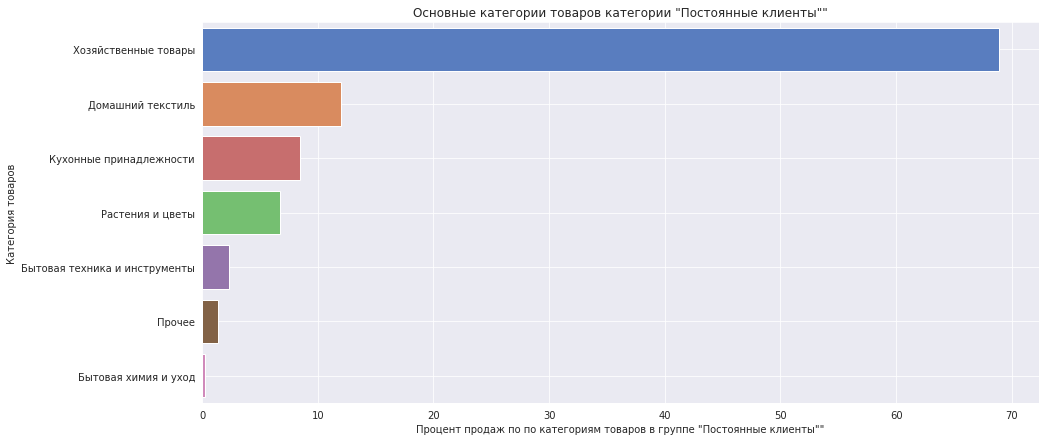

In [97]:
sns.set_style('dark') # выбираем стиль сетки
plt.figure(figsize=(15, 7)) # назначаем размер графика


# строим столбчатый график средствами seaborn
#plt.pie(df_temp['per'], labels=df_temp['category'], autopct='%1.1f%%', startangle=90)
#sns.barplot(x='category', y='per', data=df_temp)
sns.barplot(y='category', x='per', data=df_temp, orient='h', palette=palette_order)

text_for_title = 'Основные категории товаров категории "' + category_for_research + '""'
text_for_xlabel = 'Процент продаж по по категориям товаров в группе "' + category_for_research + '""'

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title(text_for_title)
plt.xlabel(text_for_xlabel)
plt.ylabel('Категория товаров')


# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

# plt.xlim(0, 600) # ограничиваем ось X для наглядности
# plt.ylim(0, 5000) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране




##### Выводы:
1. Основная категория продаж – "Хозяйственные товары" (68.92% от общего объема). Это явный лидер, составляющий более двух третей всех продаж.
2. Второе место – "Домашний текстиль" (12%). Категория значима, но её доля почти в 6 раз меньше, чем у лидера.
3. "Кухонные принадлежности" и "Растения и цветы" имеют небольшую долю.
4. У остальных групп вклад в выручку минимален

In [98]:
df_temp = (df_all.query('customer_category == @category_for_research')
           .pivot_table(index = 'year_month', columns='category', values = 'total', aggfunc = 'sum')
          )

min_data = df_all.query('customer_category == @category_for_research')['year_month'].min()

#print(min_data)
df_temp = df_temp.sort_values(by = min_data ,axis = 1 , ascending= False)

#df_temp = df_temp.reset_index()
df_temp['total'] = df_temp.sum(axis=1)
df_temp


category,Хозяйственные товары,Кухонные принадлежности,Домашний текстиль,Растения и цветы,Бытовая техника и инструменты,Бытовая химия и уход,Прочее,total
year_month,,,,,,,,
2018-10-01,44417.00,8090.00,3312.00,149.00,NaN,NaN,NaN,55968.00
2018-11-01,37593.00,1819.00,14348.00,1407.00,NaN,NaN,67.00,55234.00
2018-12-01,60805.00,4028.00,19426.00,2095.00,2849.00,89.00,1956.00,91248.00
2019-01-01,28091.00,1767.00,10919.00,1201.00,1424.00,539.00,5399.00,49340.00
2019-02-01,74113.00,9146.00,5835.00,3783.00,1236.00,718.00,NaN,94831.00
2019-03-01,77162.00,9389.00,11188.00,3320.00,NaN,NaN,NaN,101059.00
2019-04-01,44306.00,1064.00,8183.00,7673.00,7326.00,NaN,712.00,69264.00
2019-05-01,19472.00,1774.00,2671.00,1165.00,NaN,NaN,NaN,25082.00
2019-06-01,43992.00,1431.00,4376.00,735.00,NaN,NaN,NaN,50534.00


##### Выводы по группе "Постоянные клиенты":
1. После Августа 2019 имеет стабильный рост выручки от этой группы.
2. Минимальные продажи зафиксированы в мае. 
3. Пики продаж приходятся на декабрь (2018 и 2019), что связано с предновогодними покупками.
4. Минимальные продажи – май 2019 (25 082 ₽) и август 2019 (42 143 ₽) (летний спад) и январь 2018.

In [99]:
df_temp = df_all.query('customer_category == @category_for_research').groupby(['year_month','category']).agg({
    'total': 'sum'
})
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('year_month'))

#df_temp.head(10)

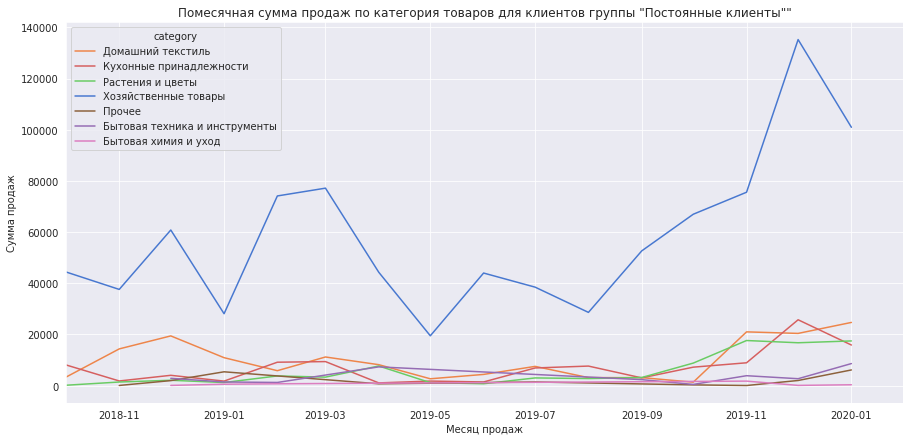

In [100]:
sns.set_style('dark') # выбираем стиль сетки
sns.set_palette('Set2') # выбираем стиль палитры
plt.figure(figsize=(15, 7)) # назначаем размер графика

# строим столбчатый график средствами seaborn
sns.lineplot(x='year_month', y='total', hue='category', data=df_temp, palette=palette_order)

text_for_title = 'Помесячная сумма продаж по категория товаров для клиентов группы "' + category_for_research + '""'
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title(text_for_title)

plt.xlabel('Месяц продаж')
plt.ylabel('Сумма продаж')

# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

plt.xlim(min_date_x, max_date_x) 
#plt.xlim(pd.to_datetime("2018-02-01"), pd.to_datetime("2020-02-01")) # ограничиваем ось X для наглядности
#plt.ylim(0, 300000) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране

##### Выводы по группе "Постоянные клиенты":
1. Хозяйственные товары (основная категория) показывает рост на протяжении года.
    - Имеются Пики покупок в декабре (Новогодние покупки) и спад относительно декабря в январе.
    - Февраль и март имеют хорошие продажи.
    - Идет спад продаж с апреля до августа, и постепенный стабильный рост с сентября до декабря
2. Остальные товарные группы не имеют ярко выраженных пиков.
    - Имеется общий уверенный рост продаж начиная с октября по декабрь в группах (скорее всего новогодние покупки): Кухонные принадлежности, Домашний текстиль, Растения и цветы

#### Проанализировать продажи товаров каждой категории по сезонам для категории покупателей "Неактивные клиенты"


In [101]:
category_for_research = "Неактивные клиенты"

In [102]:
df_temp = df_all.query('customer_category == @category_for_research').groupby(['category']).agg({'total': 'sum'})
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('total'),ascending = False)
df_temp['per'] = df_temp['total'] / df_temp['total'].sum() * 100
df_temp

,category,total,per
6,Хозяйственные товары,609189.00,52.75
5,Растения и цветы,281279.00,24.35
2,Домашний текстиль,185040.00,16.02
3,Кухонные принадлежности,61561.00,5.33
0,Бытовая техника и инструменты,6906.00,0.60
1,Бытовая химия и уход,6033.00,0.52
4,Прочее,4933.00,0.43


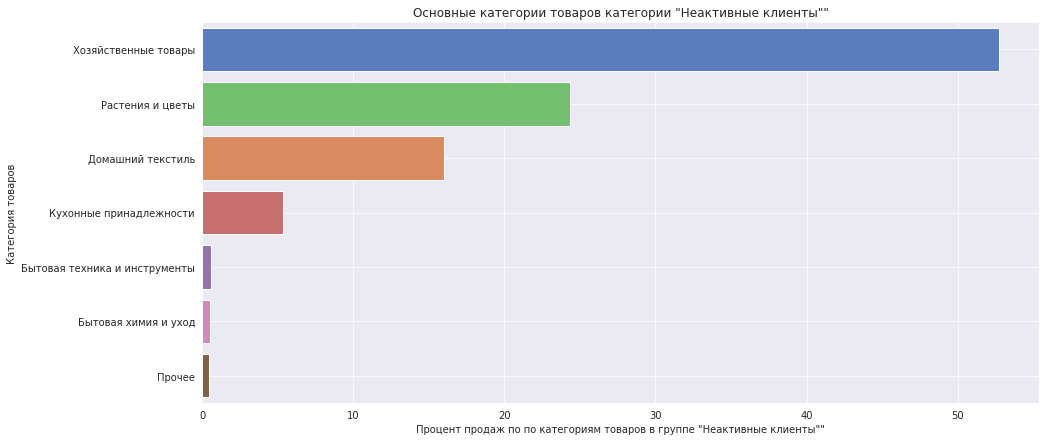

In [103]:
sns.set_style('dark') # выбираем стиль сетки
plt.figure(figsize=(15, 7)) # назначаем размер графика


# строим столбчатый график средствами seaborn
#plt.pie(df_temp['per'], labels=df_temp['category'], autopct='%1.1f%%', startangle=90)
#sns.barplot(x='category', y='per', data=df_temp)

sns.barplot(y='category', x='per', data=df_temp, orient='h', palette=palette_order)

text_for_title = 'Основные категории товаров категории "' + category_for_research + '""'
text_for_xlabel = 'Процент продаж по по категориям товаров в группе "' + category_for_research + '""'

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title(text_for_title)
plt.xlabel(text_for_xlabel)
plt.ylabel('Категория товаров')


# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

# plt.xlim(0, 600) # ограничиваем ось X для наглядности
# plt.ylim(0, 5000) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране

##### Выводы:
1. Хозяйственные товары (52.75%) и Растения и цветы (24.35%) – это две самые популярные категории, на которые приходится более 77% всех продаж. 
2. Третья по популярности категория Домашний текстиль (16 %)
3. Кухонные принадлежности занимают 5,3 % выручки.
4. Остальные категории незначительны.

In [104]:
df_temp = (df_all.query('customer_category == @category_for_research')
           .pivot_table(index = 'year_month', columns='category', values = 'total', aggfunc = 'sum')
          )

min_data = df_all.query('customer_category == @category_for_research')['year_month'].min()

#print(min_data)
df_temp = df_temp.sort_values(by = min_data ,axis = 1 , ascending= False)

#df_temp = df_temp.reset_index()
df_temp['total'] = df_temp.sum(axis=1)
df_temp

category,Растения и цветы,Бытовая техника и инструменты,Бытовая химия и уход,Домашний текстиль,Кухонные принадлежности,Прочее,Хозяйственные товары,total
year_month,,,,,,,,
2019-01-01,1418.00,NaN,NaN,NaN,NaN,NaN,NaN,1418.00
2019-02-01,1447.00,NaN,NaN,NaN,NaN,NaN,1498.00,2945.00
2019-03-01,1671.00,NaN,NaN,NaN,254.00,NaN,898.00,2823.00
2019-04-01,72389.00,1274.00,269.00,50584.00,7641.00,NaN,86800.00,218957.00
2019-05-01,95178.00,1578.00,NaN,4813.00,7987.00,NaN,92227.00,201783.00
2019-06-01,36637.00,NaN,NaN,33670.00,4006.00,NaN,108777.00,183090.00
2019-07-01,23784.00,1332.00,NaN,31422.00,14457.00,749.00,96463.00,168207.00
2019-08-01,23097.00,NaN,5764.00,13483.00,8039.00,97.00,88287.00,138767.00
2019-09-01,16539.00,2634.00,NaN,31287.00,15336.00,4087.00,43617.00,113500.00


##### Выводы:
1. Общая выручка по месяцам стабильно падает от месяца к месяцу. При пиковых значениях апреле 2019

In [105]:
df_temp = df_all.query('customer_category == @category_for_research').groupby(['year_month','category']).agg({
    'total': 'sum'
})
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('year_month'))

#df_temp.head(10)

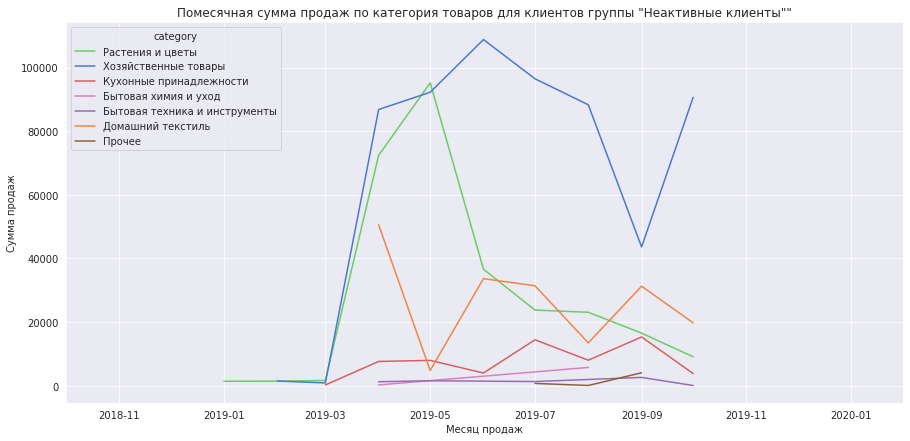

In [106]:
sns.set_style('dark') # выбираем стиль сетки
sns.set_palette('muted') # выбираем стиль палитры
plt.figure(figsize=(15, 7)) # назначаем размер графика

# строим столбчатый график средствами seaborn
sns.lineplot(x='year_month', y='total', hue='category', data=df_temp, palette=palette_order)

text_for_title = 'Помесячная сумма продаж по категория товаров для клиентов группы "' + category_for_research + '""'
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title(text_for_title)

plt.xlabel('Месяц продаж')
plt.ylabel('Сумма продаж')

# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

plt.xlim(min_date_x, max_date_x) 
#plt.xlim(4, 5) # ограничиваем ось X для наглядности
#plt.ylim(0, 300000) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране

##### Выводы:
1. Растения и цветы имеют сезонность. с большими продажами в апреле, с пиком в мае. и постепенным снижением продаж в летнем и осеннем периоде.
2. Хозяйственные товары имеют стабильные продажи, имеющие небольшие просадки в сентябре.
3. Домашний текстиль так же имеют заметные продажи, с тенденцией к снижению продаж.

#### Проанализировать продажи товаров каждой категории по сезонам для категории покупателей "Ушедшие клиенты"

In [107]:
category_for_research = "Ушедшие клиенты"

In [108]:
df_temp = df_all.query('customer_category == @category_for_research').groupby(['category']).agg({'total': 'sum'})
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('total'),ascending = False)
df_temp['per'] = df_temp['total'] / df_temp['total'].sum() * 100
df_temp

,category,total,per
6,Хозяйственные товары,738735.00,52.87
2,Домашний текстиль,246795.00,17.66
3,Кухонные принадлежности,229886.00,16.45
5,Растения и цветы,162580.00,11.64
1,Бытовая химия и уход,7882.00,0.56
0,Бытовая техника и инструменты,6633.00,0.47
4,Прочее,4738.00,0.34


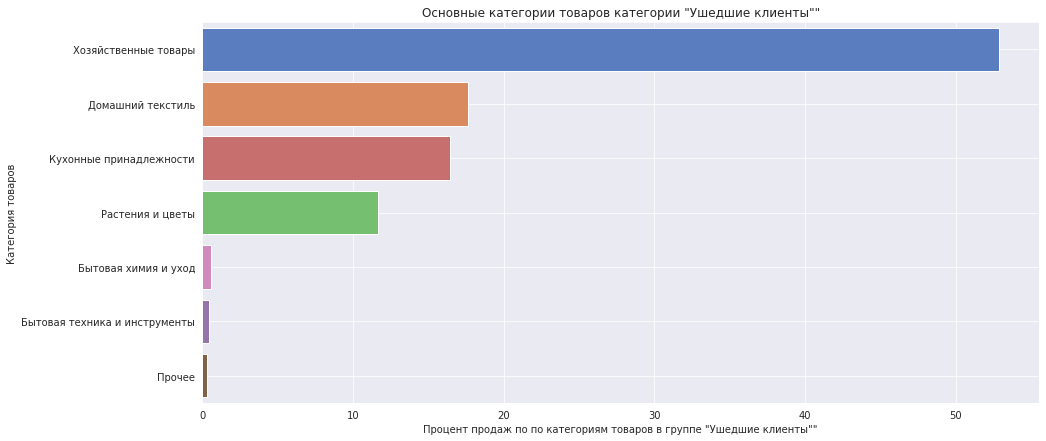

In [109]:
sns.set_style('dark') # выбираем стиль сетки
plt.figure(figsize=(15, 7)) # назначаем размер графика


# строим столбчатый график средствами seaborn
#plt.pie(df_temp['per'], labels=df_temp['category'], autopct='%1.1f%%', startangle=90)
#sns.barplot(x='category', y='per', data=df_temp)
sns.barplot(y='category', x='per', data=df_temp, orient='h', palette=palette_order)

text_for_title = 'Основные категории товаров категории "' + category_for_research + '""'
text_for_xlabel = 'Процент продаж по по категориям товаров в группе "' + category_for_research + '""'

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title(text_for_title)
plt.xlabel(text_for_xlabel)
plt.ylabel('Категория товаров')


# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений

# plt.xlim(0, 600) # ограничиваем ось X для наглядности
# plt.ylim(0, 5000) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране

##### Выводы:
1. Хозяйственные товары (52.87%) – абсолютный лидер, более половины выручки.
2. Домашний текстиль (17.66%) и Кухонные принадлежности (16.45%) – значимые категории.
3. Растения и цветы (11.64%) – заметная ниша
4. Остальные категории не значительны.

In [110]:
df_temp = (df_all.query('customer_category == @category_for_research')
           .pivot_table(index = 'year_month', columns='category', values = 'total', aggfunc = 'sum')
          )

min_data = df_all.query('customer_category == @category_for_research')['year_month'].min()

#print(min_data)
df_temp = df_temp.sort_values(by = min_data ,axis = 1 , ascending= False)

#df_temp = df_temp.reset_index()
df_temp['total'] = df_temp.sum(axis=1)
df_temp

category,Хозяйственные товары,Домашний текстиль,Кухонные принадлежности,Растения и цветы,Бытовая техника и инструменты,Прочее,Бытовая химия и уход,total
year_month,,,,,,,,
2018-10-01,158867.00,46873.00,45263.00,30160.00,1744.00,1237.00,603.00,284747.00
2018-11-01,167157.00,39273.00,76123.00,19708.00,1450.00,38.00,789.00,304538.00
2018-12-01,149030.00,56122.00,27725.00,11735.00,2068.00,745.00,2525.00,249950.00
2019-01-01,66592.00,71384.00,20925.00,21042.00,NaN,134.00,224.00,180301.00
2019-02-01,121847.00,19281.00,33308.00,25317.00,NaN,2584.00,2328.00,204665.00
2019-03-01,69509.00,13053.00,17040.00,43269.00,1371.00,NaN,1413.00,145655.00
2019-04-01,5733.00,809.00,9502.00,11349.00,NaN,NaN,NaN,27393.00


##### Выводы:
1. Максимальные продажи в ноябре и тенденции к снижению продаж.

In [111]:
df_temp = df_all.query('customer_category == @category_for_research').groupby(['year_month','category']).agg({
    'total': 'sum'
})
df_temp = df_temp.reset_index()
df_temp = df_temp.sort_values(by = ('year_month'))

#df_temp.head(10)

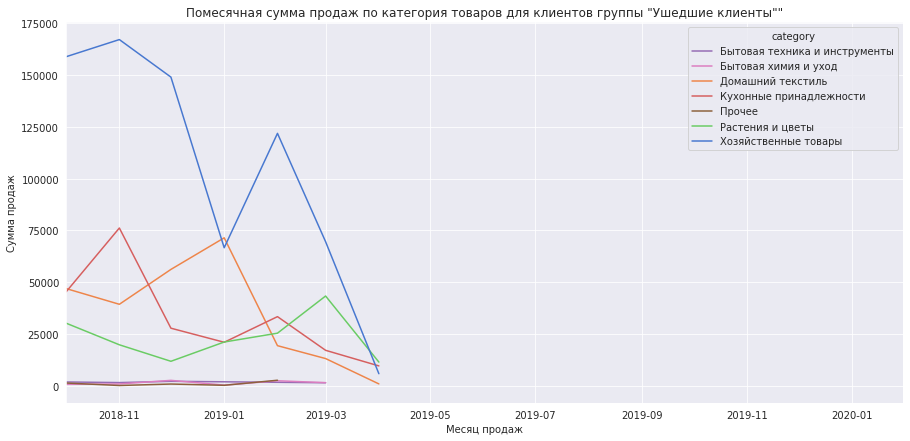

In [112]:
sns.set_style('dark') # выбираем стиль сетки
sns.set_palette('muted') # выбираем стиль палитры
plt.figure(figsize=(15, 7)) # назначаем размер графика

# строим столбчатый график средствами seaborn
sns.lineplot(x='year_month', y='total', hue='category', data=df_temp , palette=palette_order)

text_for_title = 'Помесячная сумма продаж по категория товаров для клиентов группы "' + category_for_research + '""'
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title(text_for_title)

plt.xlabel('Месяц продаж')
plt.ylabel('Сумма продаж')

# plt.xticks(rotation=45) # поворачиваем подписи значений
# plt.yticks(rotation=45) # поворачиваем подписи значений


plt.xlim(min_date_x, max_date_x)
#plt.xlim(4, 5) # ограничиваем ось X для наглядности
#plt.ylim(0, 300000) # ограничиваем ось X для наглядности

#plt.legend() # легенда # plt.legend(loc='lower right', fontsize=10)
plt.grid() # добавляем сетку
plt.show() # отображаем график на экране

##### Выводы:
1. Хозяйственные товары имеют большие продажи в остябре-декабре (предновогодние продажи).
    - Просадка в январе
2. Домашний текстиль имеет хорошие продажи с октября по январь с пиком в январе.
3. Кухонняе принадлежности имеют пик продаж в ноябре.
4. Растения и цветы имеют плохие продажи в ноябре-декабре. и постепенно увеличиваются после января с пиком в марте.

In [113]:
# Посчитаем доли каждой категории и суммарный продажи по категориям
df_temp_2 = df_all.groupby(['category']).agg({'total': 'sum'})
df_temp_2['per'] = df_temp_2['total'] / df_temp_2['total'].sum() * 100

for category_for_research in df_all['customer_category'].unique():
    df_temp = (df_all.query('customer_category == @category_for_research')
              .groupby(['category'])
              .agg({'total': 'sum'}))
    df_temp['per'] = df_temp['total'] / df_temp['total'].sum() * 100
    df_temp.columns = [category_for_research,('per ' + category_for_research )]
    df_temp_2 = df_temp_2.join(df_temp)
               
    
df_temp_2 = df_temp_2.sort_values(by = 'total', ascending= False)
df_temp_2    

,total,per,Ушедшие клиенты,per Ушедшие клиенты,Постоянные клиенты,per Постоянные клиенты,Неактивные клиенты,per Неактивные клиенты
category,,,,,,,,
Хозяйственные товары,2276311.42,58.38,738735.00,52.87,928387.42,68.92,609189.00,52.75
Домашний текстиль,593305.67,15.22,246795.00,17.66,161470.67,11.99,185040.00,16.02
Растения и цветы,534960.33,13.72,162580.00,11.64,91101.33,6.76,281279.00,24.35
Кухонные принадлежности,405239.00,10.39,229886.00,16.45,113792.00,8.45,61561.00,5.33
Бытовая техника и инструменты,44368.00,1.14,6633.00,0.47,30829.00,2.29,6906.00,0.60
Прочее,27689.00,0.71,4738.00,0.34,18018.00,1.34,4933.00,0.43
Бытовая химия и уход,17446.00,0.45,7882.00,0.56,3531.00,0.26,6033.00,0.52


##### Вывод:
1. Самая высокая выручка у категории "Хозяйственные товары"
2. Далее по выручке идут категории: "Домашний текстиль", "Растения и цветы", "Кухонные принадлежности"
3. Категории приносящие меньше всего выручки: "Бытовая техника", "Бытовая химия и уход", "Прочее"

### Выводы:

1. Помесячная выручка имеет падающий тренд.

2. По количеству покупок:
    1. Однозначного тренда не наблюдаем.
    2. Разброс значений количества покупок от 170 в худшие месяцы до 280 в лучшие месяцы.
    3. После августа 2019 идет стабилизация и постепенный рост количества продаж.

3. Динамик среднего чека:
    1. Помесячные средние чеки показывают убывающюю динамику.
    2. Июнь 2019 выделяется большим значением среднего чека на фоне соседних месяцев. Но после него так же имеется тенденция к снижений среднего чека
    
4. Выводы по средней выручке с покупателя:
    1. Средняя выручка с покупателя так же имеем убывающий тренд   
    1. По графику разброса сумм чеков видно уменьшение медианы сумм чеков.
    

5. Ключевые выводы по категориям товаров:
    - Хозяйственные товары имеют самые большую выручку и занимает 58 процентов от общих продаж, а так же лидирует во всех группах клиентов.
    - Далее по выручке идут категории: "Домашний текстиль", "Растения и цветы", "Кухонные принадлежности"
    - Категории приносящие незначительну часть выручки: "Бытовая техника", "Бытовая химия и уход", "Прочее"
     
    
6. Выводы по сезонности по группам товаров:
    1. Во всех категориях имеется тенденция на снижение выручки на всем периоде.
    2. В категории "Хозяйственные товары" имеются хорошие продажи 2018 года. Так же имеются провалы продаж января 2019, сентября 2019, ноября 2019.
    3. В категории "Кухонные принадлежности" видим пик продаж в ноябре 2018, и постепенное снижение продаж на остальном периоде.
    4. В категории "Домашний текстиль"  видим пик продаж в январе 2019 и постепенное снижение продаж на остальном периоде, особенно выделяется низкими продажами май 2019 
    5. В категории "Растения и цветы" видим сезонность продаж, в марте продажи начинают увеличиваться, с пиковыми продажами в апреле и мае, лето держатся средние значения продаж, а в осенние и зимние месяцы продажи стабильно низкие продаж
    
    
    
7. Пользователи редко возвращаются и совершают покупки: 
    - Только половина покупаетелей совершают более 1 покупки


    
8. В данных представлено разделение клиентов на 3 группы:
    - Постоянные клиенты – активные покупатели
    - Неактивные клиенты – делали покупки в прошлом, но сейчас неактивны
    - Ушедшие клиенты – прекратили покупки
    
     
9. Клиенты по выручке:
    1. В каждой категории покупателей примерно одинаковое количество покупателей (800)
    2. Ушедшие клиенты лидеры по общей выручке. Они сделали 1024 покупки с самым большим средним чеком 1364
    3. Постоянные клиенты занимают второе место по выручке, совершив больше всего (1545) покупок со самым маленьким средним чеком (872)
    4. Меньше всего выручки приносят "Неактивные клиенты", совершив самое маленькое количество покупок 922, со средним чеком (1252)

    
10. Выводы по группам клиентов:
    1. Выводы по группе "Постоянные клиенты":
        1. По графикам видно что после Августа 2019 имеет стабильный рост выручки от этой группы.
        2. Минимальные продажи зафиксированы в мае. 
        3. Пики продаж приходятся на декабрь (2018 и 2019), что связано с предновогодними покупками.
        4. Минимальные продажи – май 2019 (25 082 ₽) и август 2019 (42 143 ₽) (летний спад) и январь 2018.
        5. Хозяйственные товары (основная категория) показывает рост на протяжении года.
            - Имеются Пики покупок в декабре (Новогодние покупки) и спад относительно декабря в январе.
            - Февраль и март имеют хорошие продажи.
            - Идет спад продаж с апреля до августа, и постепенный стабильный рост с сентября до декабря
        6. Остальные товарные группы не имеют ярко выраженных пиков.
            - Имеется общий уверенный рост продаж начиная с октября по декабрь в группах (скорее всего новогодние покупки): Кухонные принадлежности, Домашний текстиль, Растения и цветы   
    
    2. Выводы по группе "Постоянные клиенты":   
        1. Хозяйственные товары (52.75%) и Растения и цветы (24.35%) – это две самые популярные категории, на которые приходится более 77% всех продаж. 
        2. Третья по популярности категория Домашний текстиль (16 %)
        3. Кухонные принадлежности занимают 5,3 % выручки.
        4. Остальные категории незначительны.        
        5. Общая выручка по месяцам стабильно падает от месяца к месяцу. При пиковых значениях апреле 2019
        6. Растения и цветы имеют сезонность. с большими продажами в апреле, с пиком в мае. и постепенным снижением продаж в летнем и осеннем периоде.
        7. Хозяйственные товары имеют стабильные продажи, имеющие небольшие просадки в сентябре.
        8. Домашний текстиль так же имеют заметные продажи, с тенденцией к снижению продаж.

    3. Выводы по группе "Ушедшие клиенты": 
        1. Хозяйственные товары (52.87%) – абсолютный лидер, более половины выручки.
        2. Домашний текстиль (17.66%) и Кухонные принадлежности (16.45%) – значимые категории.
        3. Растения и цветы (11.64%) – заметная ниша
        4. Остальные категории не значительны.
        5. Максимальные продажи в октябре и тенденции к снижению продаж.
        6. Хозяйственные товары имеют большие продажи в остябре-декабре (предновогодние продажи).
            - Просадка в январе
        7. Домашний текстиль имеет хорошие продажи с октября по январь с пиком в январе.
        8. Кухонняе принадлежности имеют пик продаж в ноябре.
        9. Растения и цветы имеют плохие продажи в ноябре-декабре. и постепенно увеличиваются после января с пиком в марте.


### Цели исследования
#### Сформировать рекомендации по маркетингу:

1. группе "Постоянные клиенты":
    1. Круглый год у этой группы клиентов Хозяиственные товары имеют хорошие продажи 
        - нужно постоянно поддерживать активность клиентов рассылая им акции, новости о новинках и выгодных предложениях.
    2. Имеется рост продаж начиная с октября по декабрь в группах (скорее всего новогодние покупки):Хозяиственные товары, Кухонные принадлежности, Домашний текстиль, Растения и цветы
        - Нужно сформировать предложения об акциях в этих группах товаров. и рассылать клиентам предновогодние скидки, а так же предложения на январь, для купирования просадок продаж.
        

2. группе "Неактивные клиенты":
    1. У клиентов хорошие продажи в группах Хозяйственные товары 
        - Попробовать вернуть клиентов направив им предложение о выгодной покупке.
    2. Растения и цветы имеют сезонность с большими продажами в апреле, с пиком в мае. и постепенным снижением продаж в летнем и осеннем периоде.
        - Необходимо сформировать выгодные предложения для категории "Растения и цветы" и разослать клиентам с марта по июнь, чтобы максимизировать выручку.
        

3. группе "Ушедшие клиенты":
    1. Хозяйственные товары (52.87%) – абсолютный лидер, более половины выручки. Домашний текстиль (17.66%) и Кухонные принадлежности (16.45%) – значимые категории.Растения и цветы (11.64%) – заметная ниша
        - Подобные клиенты, скорее всего, больше не вернутся
        - Можно отправить опрос и узнать, почему клиенты больше не пользуются вашими услугами
        - Следует попытаться вернуть таких клиентов. Это можно сделать с помощью рассылки, в которой будет информация о скидках, программы лояльности и так далее.  
    

#### Разработать стратегию для повышения продаж для каждого сегмента покупателей. Разработать стратегию для повышения лояльности и возвращения для различных сегментов покупателей.

1. Для увеличения повторных покупок:
    - Внедрить программу лояльности для покупателей
    - Персональные скидки.
    - Бонусы за повторные покупки
    


2. Сосредоточится на основных группах товаров:
    - Хозяйственных товаров как лидере продаж
    - "Домашний текстиль", "Растения и цветы", "Кухонные принадлежности" так же хорошо продаются
    - Главный риск: отток даже в прибыльных категориях, продумать выгодные предолжения.
    
        
3. Для развития слабых категорий
    - Кросс-продажи:
    - При покупке бытовой техники предлагать химию ("Средство для очистки в подарок")


4. Сезонные акции для "Растений и цветов":
    - Подписка на уход за растениями (напоминания о поливе + предложения удобрений).
    - Пакетные предложения: "Цветок + горшок + грунт со скидкой 20%".


5. Предложения для предпраздничных покупок:
    - Особенно уделить внимание на выгодных предложениях к новому году.


6. Для неактивных клиенты:
    - Вернуть интерес и стимулировать повторные покупки.
    - Email- и SMS-маркетинг
    - Персональные акции
    

7. Ушедшие клиенты:
    - Выяснить причины ухода и вернуть.
    - Специальные условия для возврата (вернувшимся 10% скидка)
    




#### Рекомендации по рекламе по сегментам клиентов:

1. Сегмент Постоянные клиенты:

- Январь - предлагаем товары из категорий: Хозяйственные товары, Домашний текстиль
- Февраль - предлагаем товары из категорий: Хозяйственные товары
- Март - предлагаем товары из категорий: Хозяйственные товары
- Апрель - предлагаем товары из категорий: Хозяйственные товары
- Май - предлагаем товары из категорий: Хозяйственные товары
- Июнь - предлагаем товары из категорий: Хозяйственные товары
- Июль - предлагаем товары из категорий: Хозяйственные товары 
- Август - предлагаем товары из категорий: Хозяйственные товары
- Сентябрь - предлагаем товары из категорий: Хозяйственные товары
- Октябрь - предлагаем товары из категорий:  Хозяйственные товары, 
- Ноябрь - предлагаем товары из категорий: Хозяйственные товары, Домашний текстиль, Растения и цветы
- Декабрь - предлагаем товары из категорий: Хозяйственные товары, Домашний текстиль, Растения и цвет, Кухонные принадлежности 


2. Сегмент Неактивные клиенты:

- Январь - предлагаем товары из категорий: Хозяйственные товары
- Февраль - предлагаем товары из категорий: Хозяйственные товары
- Март - предлагаем товары из категорий: Хозяйственные товары
- Апрель - предлагаем товары из категорий: Хозяйственные товары, Растения и цветы, Домашний текстиль
- Май  - предлагаем товары из категорий: Растения и цветы, Хозяйственные товары
- Июнь - предлагаем товары из категорий: Хозяйственные товары, Растения и цветы
- Июль - предлагаем товары из категорий: Хозяйственные товары, Растения и цветы, Домашний текстиль
- Август - предлагаем товары из категорий: Хозяйственные товары, Растения и цветы
- Сентябрь - предлагаем товары из категорий: Хозяйственные товары, Домашний текстиль, Растения и цветы, Кухонные принадлежности
- Октябрь - предлагаем товары из категорий: Хозяйственные товары
- Ноябрь - предлагаем товары из категорий: Хозяйственные товары
- Декабрь - предлагаем товары из категорий: Хозяйственные товары


3. Сегмент Ушедшие клиенты:

- Январь - предлагаем товары из категорий: Домашний текстиль, Хозяйственные товары
- Февраль - предлагаем товары из категорий: Хозяйственные товары
- Март - предлагаем товары из категорий: Хозяйственные товары, Растения и цветы
- Апрель - предлагаем товары из категорий: Растения и цветы, Кухонные принадлежности, Хозяйственные товары
- Май - предлагаем товары из категорий: Хозяйственные товары
- Июнь - предлагаем товары из категорий: Хозяйственные товары
- Июль - предлагаем товары из категорий: Хозяйственные товары
- Август - предлагаем товары из категорий: Хозяйственные товары
- Сентябрь - предлагаем товары из категорий: Хозяйственные товары
- Октябрь - предлагаем товары из категорий: Хозяйственные товары
- Ноябрь - предлагаем товары из категорий: Хозяйственные товары, Кухонные принадлежности
- Декабрь - предлагаем товары из категорий: Хозяйственные товары, Домашний текстиль
